**FASE 1: IMPORT DELLE LIBRERIE E CARICAMENTO DEL DATASET**

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import random
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

In [171]:
df = pd.read_csv('fetal_health.csv')
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [172]:
#aggiungo una colonna fetal_status per avere disponibile i valori categorici della target all'interno del dataset
i = 0
fet_h = df['fetal_health']
fet_status = list()
while i < len(fet_h):
    if fet_h[i] == 1.0:
        fet_status.append("Normal")
    elif fet_h[i] == 2.0:
        fet_status.append("Suspect")
    else:
        fet_status.append("Pathological")
    i=i+1
fet_status

['Suspect',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Pathological',
 'Pathological',
 'Pathological',
 'Pathological',
 'Pathological',
 'Suspect',
 'Suspect',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Suspect',
 'Normal',
 'Normal',
 'Pathological',
 'Normal',
 'Pathological',
 'Pathological',
 'Pathological',
 'Pathological',
 'Pathological',
 'Pathological',
 'Suspect',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Suspect',
 'Suspect',
 'Pathological',
 'Suspect',
 'Suspect',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Suspect',
 'Suspect',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal'

In [173]:
df['fetal_status'] = fet_status
df.head(10)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health,fetal_status
0,120.0,0.000,0.0,0.000,0.000,0.0,0.000,73.0,0.5,43.0,...,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0,Suspect
1,132.0,0.006,0.0,0.006,0.003,0.0,0.000,17.0,2.1,0.0,...,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0,Normal
2,133.0,0.003,0.0,0.008,0.003,0.0,0.000,16.0,2.1,0.0,...,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0,Normal
3,134.0,0.003,0.0,0.008,0.003,0.0,0.000,16.0,2.4,0.0,...,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0,Normal
4,132.0,0.007,0.0,0.008,0.000,0.0,0.000,16.0,2.4,0.0,...,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0,Normal
5,134.0,0.001,0.0,0.010,0.009,0.0,0.002,26.0,5.9,0.0,...,200.0,5.0,3.0,76.0,107.0,107.0,170.0,0.0,3.0,Pathological
6,134.0,0.001,0.0,0.013,0.008,0.0,0.003,29.0,6.3,0.0,...,200.0,6.0,3.0,71.0,107.0,106.0,215.0,0.0,3.0,Pathological
7,122.0,0.000,0.0,0.000,0.000,0.0,0.000,83.0,0.5,6.0,...,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0,Pathological
8,122.0,0.000,0.0,0.002,0.000,0.0,0.000,84.0,0.5,5.0,...,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0,Pathological
9,122.0,0.000,0.0,0.003,0.000,0.0,0.000,86.0,0.3,6.0,...,130.0,1.0,0.0,122.0,122.0,123.0,1.0,1.0,3.0,Pathological


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 23 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

*Il dataset non ha valori nulli*

In [63]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


**FASE 2: EDA**

Analizzo la target

In [64]:
df['fetal_status'].value_counts()

Normal          1655
Suspect          295
Pathological     176
Name: fetal_status, dtype: int64

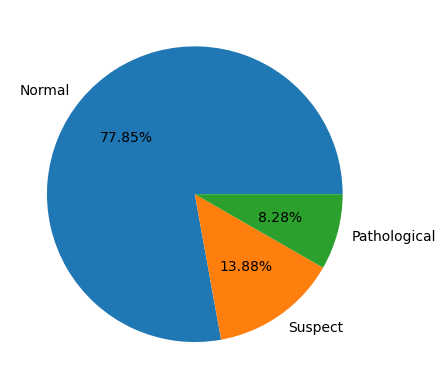

In [65]:
plt.pie(df['fetal_status'].value_counts(), labels=['Normal','Suspect','Pathological'], autopct='%.2f%%');

*Il dataset è fortemente sbilanciato verso la classe "Normal"*

Analizzo le features

In [66]:
#alcune feature risultano essere poco esplicative o con ordini di grandezza molto differenti, creo allora alcuni subset per facilitare le visualizzazioni
subset = df[['baseline value','accelerations','fetal_movement','uterine_contractions','light_decelerations','severe_decelerations','prolongued_decelerations','abnormal_short_term_variability','percentage_of_time_with_abnormal_long_term_variability','fetal_status']]
subset_xs = df[['accelerations','fetal_movement','uterine_contractions','light_decelerations','severe_decelerations','prolongued_decelerations']]
subset_s = df[['mean_value_of_short_term_variability','percentage_of_time_with_abnormal_long_term_variability','histogram_number_of_peaks','histogram_number_of_zeroes','histogram_tendency']]
subset_big = df[['baseline value','abnormal_short_term_variability','histogram_min','histogram_max','histogram_mode','histogram_mean','histogram_median','histogram_variance']]

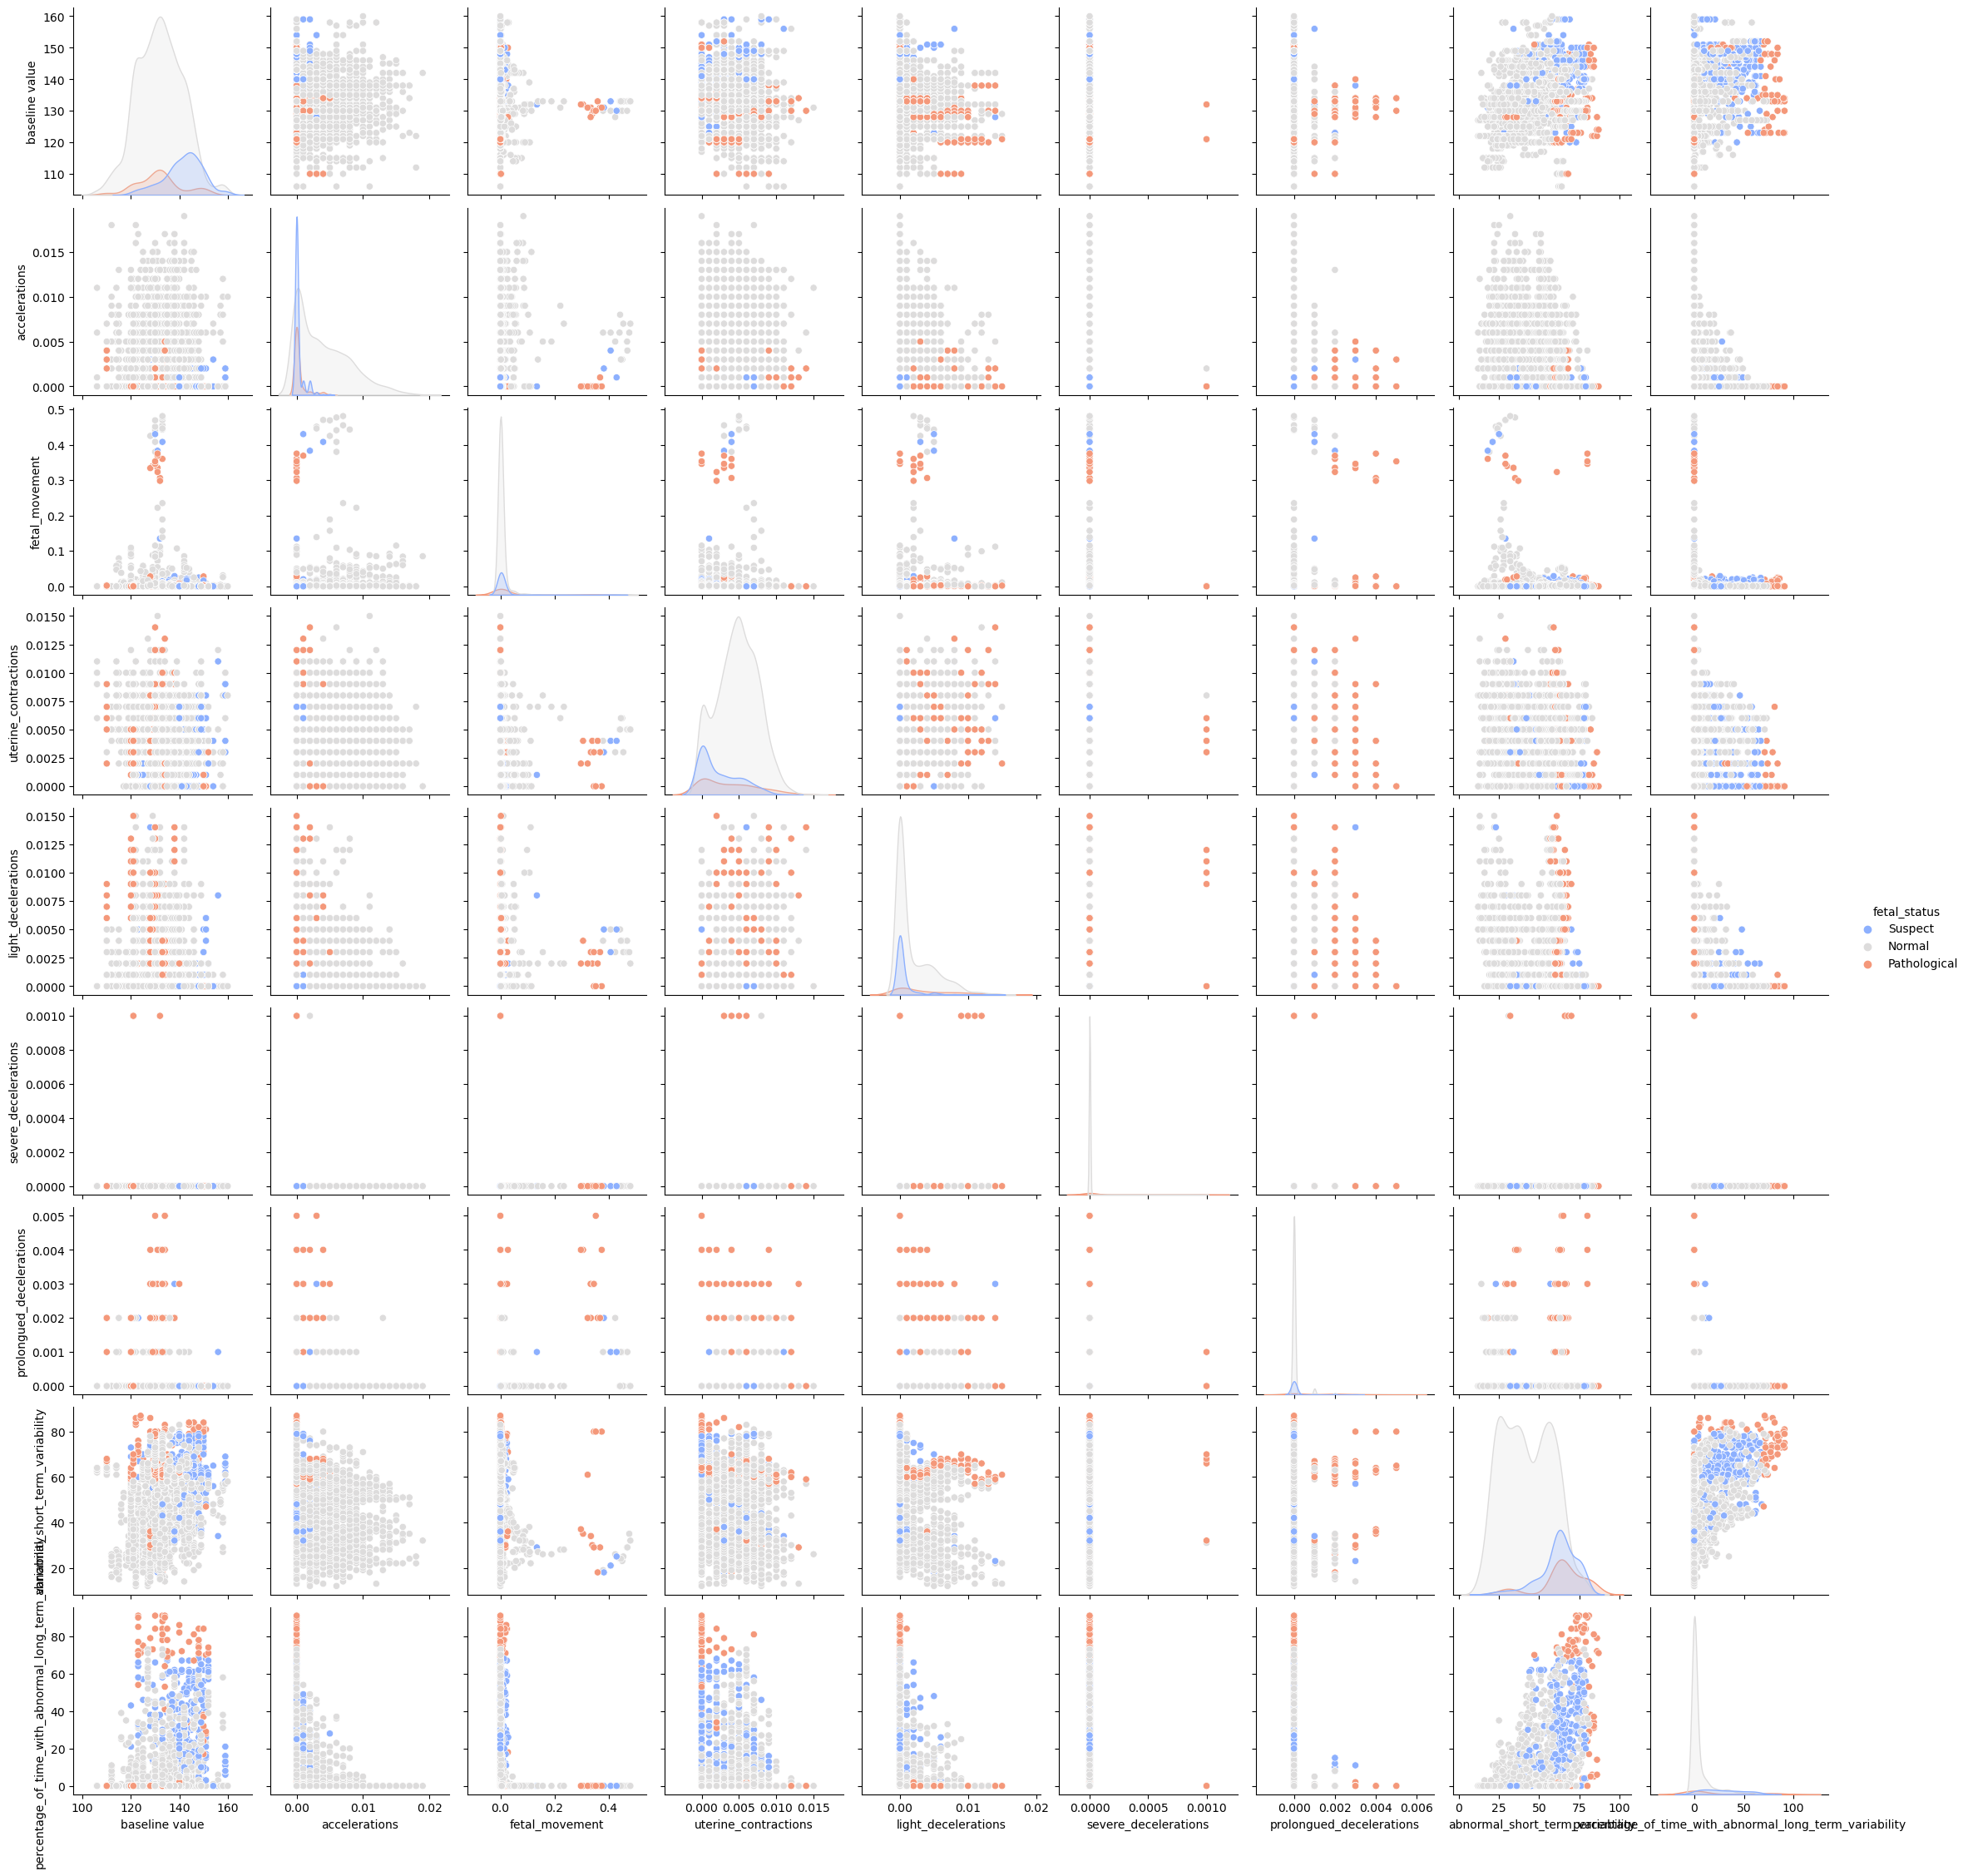

In [67]:
sns.pairplot(subset, hue = 'fetal_status', height = 2.5, palette = 'coolwarm');

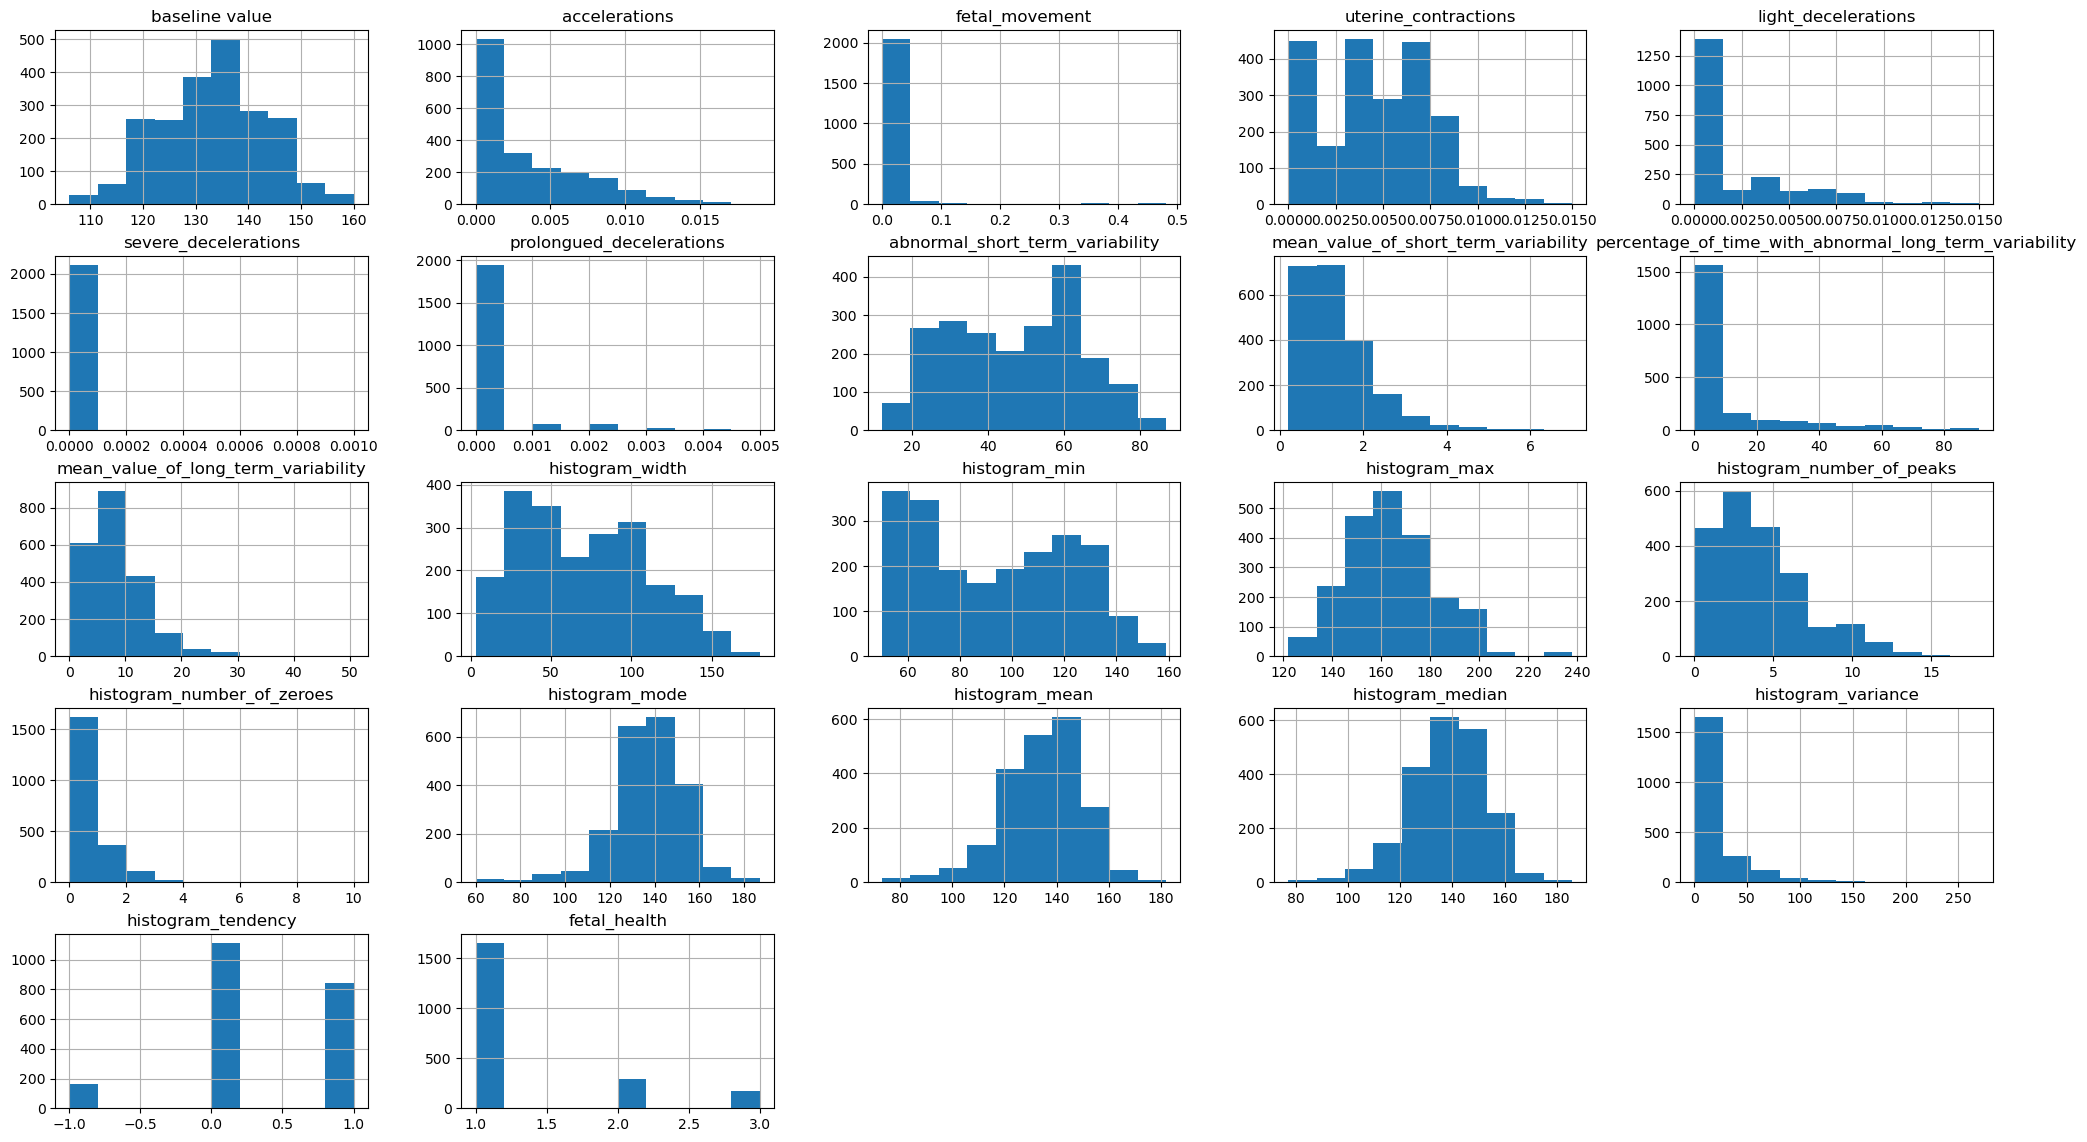

In [68]:
df.hist( figsize = (25,14))
plt.show()

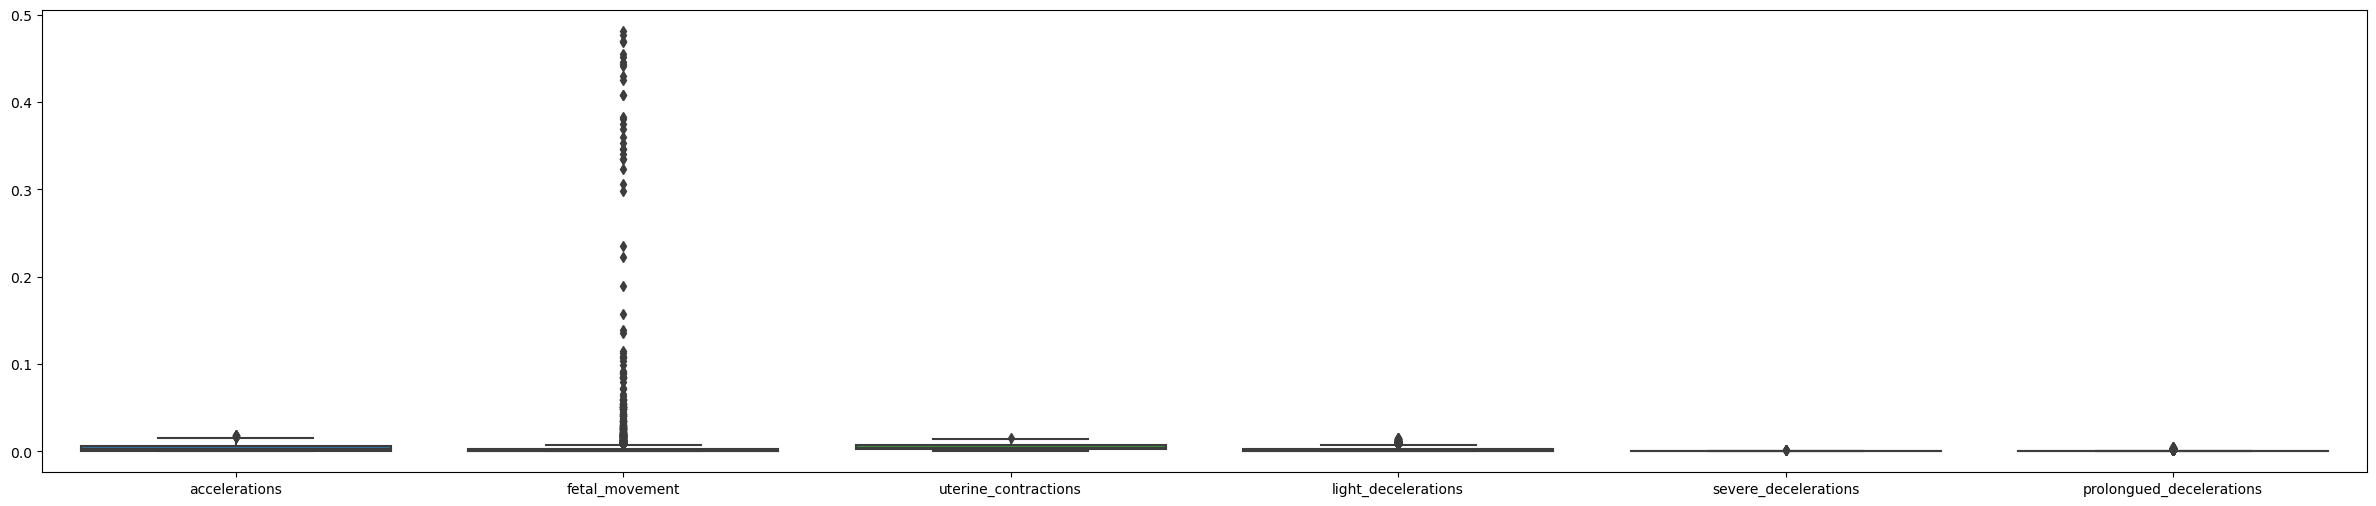

In [69]:
plt.figure(figsize=(30,6))
sns.boxplot(data=subset_xs);

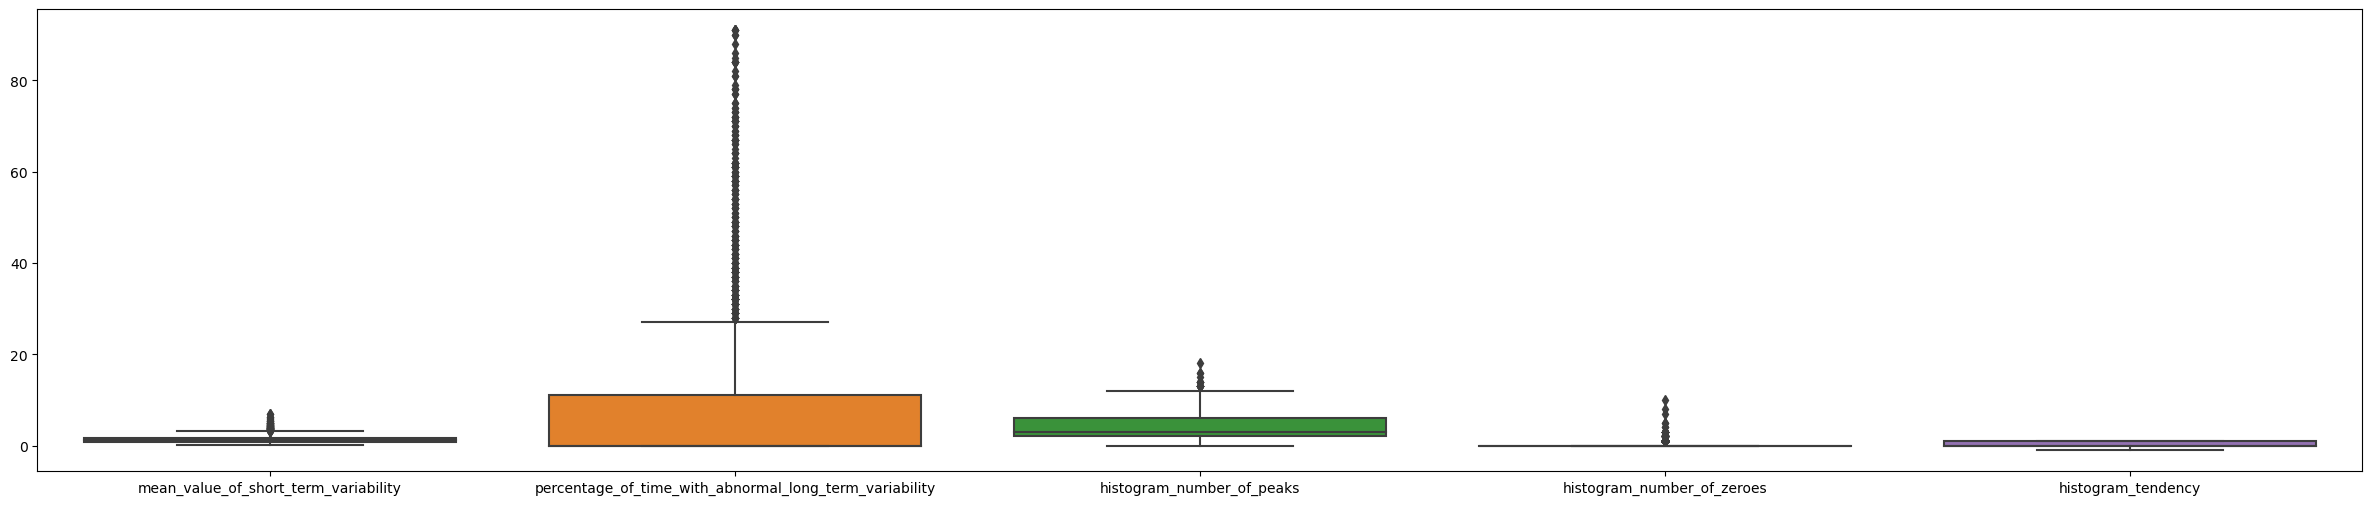

In [76]:
plt.figure(figsize=(30,6))
sns.boxplot(data=subset_s);

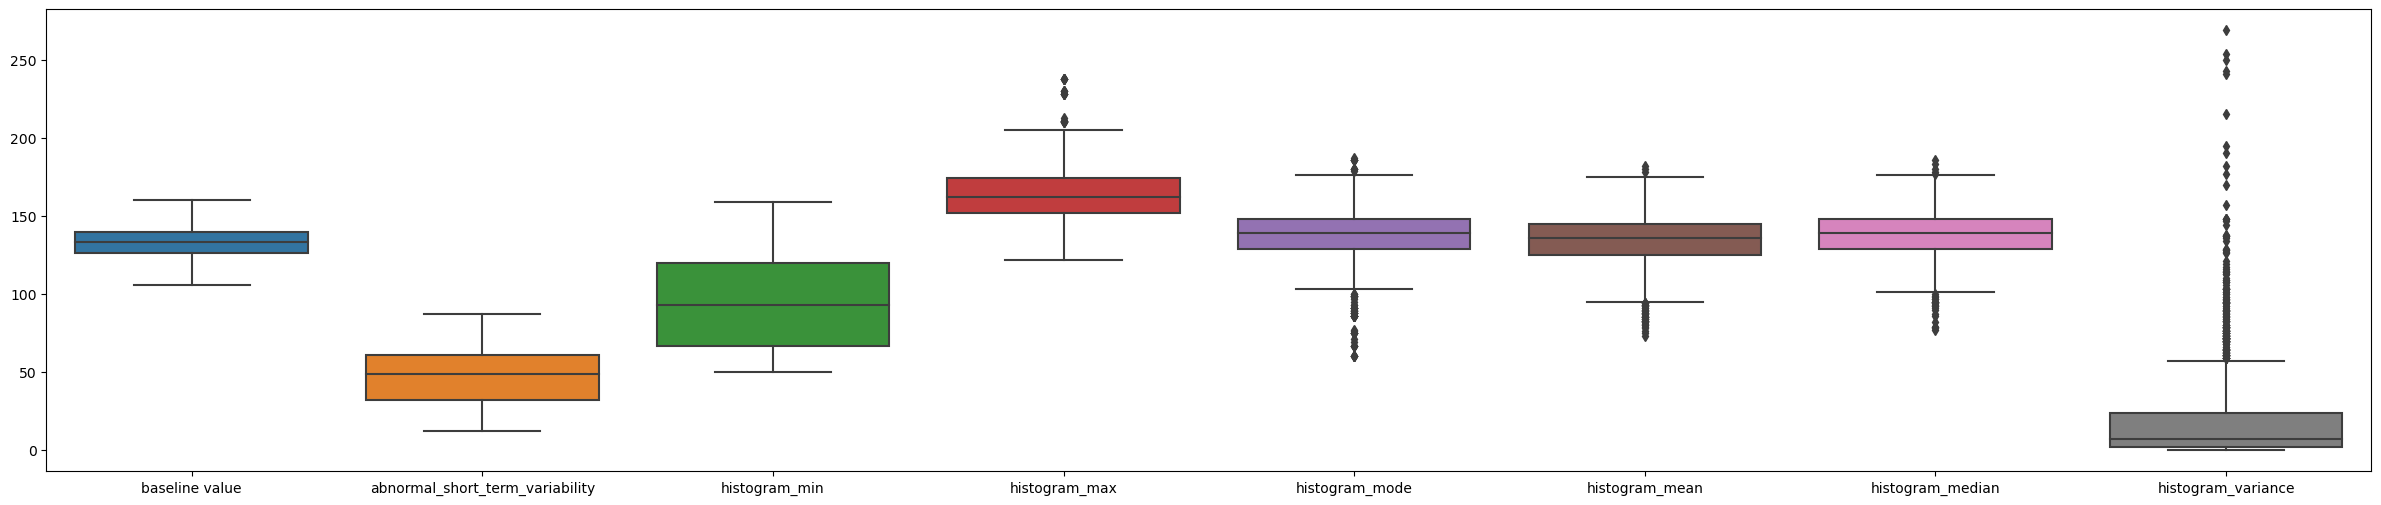

In [77]:
plt.figure(figsize=(30,6))
sns.boxplot(data=subset_big);

In [79]:
corr_metrics = df.corr()

corr_metrics.style.background_gradient()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
baseline value,1.000000,-0.080560,-0.033436,-0.146373,-0.159032,-0.053518,-0.104597,0.305570,-0.279607,0.285630,-0.032091,-0.147679,0.361619,0.275110,-0.113933,-0.004745,0.708993,0.723121,0.789246,-0.133938,0.293503,0.148151
accelerations,-0.080560,1.000000,0.048235,0.089674,-0.108615,-0.043018,-0.127749,-0.279577,0.207170,-0.373943,-0.142363,0.298631,-0.154286,0.394147,0.190452,-0.006147,0.243610,0.270334,0.272849,0.125704,0.028420,-0.364066
fetal_movement,-0.033436,0.048235,1.000000,-0.068779,0.049228,-0.010976,0.265922,-0.103715,0.121314,-0.074096,0.011047,0.162790,-0.153917,0.099853,0.164654,-0.017749,-0.061192,-0.089671,-0.072329,0.179340,-0.001541,0.088010
uterine_contractions,-0.146373,0.089674,-0.068779,1.000000,0.285079,0.006788,0.077036,-0.232811,0.289679,-0.306608,-0.066058,0.142541,-0.113323,0.122766,0.082693,0.057894,-0.104854,-0.187505,-0.140287,0.238582,-0.072314,-0.204894
light_decelerations,-0.159032,-0.108615,0.049228,0.285079,1.000000,0.107573,0.225611,-0.119152,0.562170,-0.271282,-0.242932,0.520467,-0.553534,0.218043,0.397620,0.235296,-0.347233,-0.527354,-0.388586,0.564289,0.000072,0.058870
severe_decelerations,-0.053518,-0.043018,-0.010976,0.006788,0.107573,1.000000,0.012395,0.033949,0.034130,-0.030770,-0.037667,0.044880,-0.071974,-0.021135,0.007024,0.043441,-0.215161,-0.158673,-0.160451,0.136421,-0.070483,0.131934
prolongued_decelerations,-0.104597,-0.127749,0.265922,0.077036,0.225611,0.012395,1.000000,0.046226,0.267011,-0.137333,-0.226514,0.265391,-0.276764,0.120221,0.222860,0.056423,-0.436416,-0.488663,-0.444778,0.503301,-0.215405,0.484859
abnormal_short_term_variability,0.305570,-0.279577,-0.103715,-0.232811,-0.119152,0.033949,0.046226,1.000000,-0.430705,0.459413,-0.315105,-0.260463,0.275378,-0.111806,-0.167561,-0.149296,0.058363,0.074554,0.119960,-0.146434,-0.005748,0.471191
mean_value_of_short_term_variability,-0.279607,0.207170,0.121314,0.289679,0.562170,0.034130,0.267011,-0.430705,1.000000,-0.470259,0.073892,0.660847,-0.622569,0.409072,0.501430,0.266183,-0.307586,-0.445401,-0.336109,0.555852,-0.066140,-0.103382
percentage_of_time_with_abnormal_long_term_variability,0.285630,-0.373943,-0.074096,-0.306608,-0.271282,-0.030770,-0.137333,0.459413,-0.470259,1.000000,-0.171114,-0.451297,0.422834,-0.283183,-0.279301,-0.121784,0.165211,0.222321,0.186480,-0.281536,0.042481,0.426146


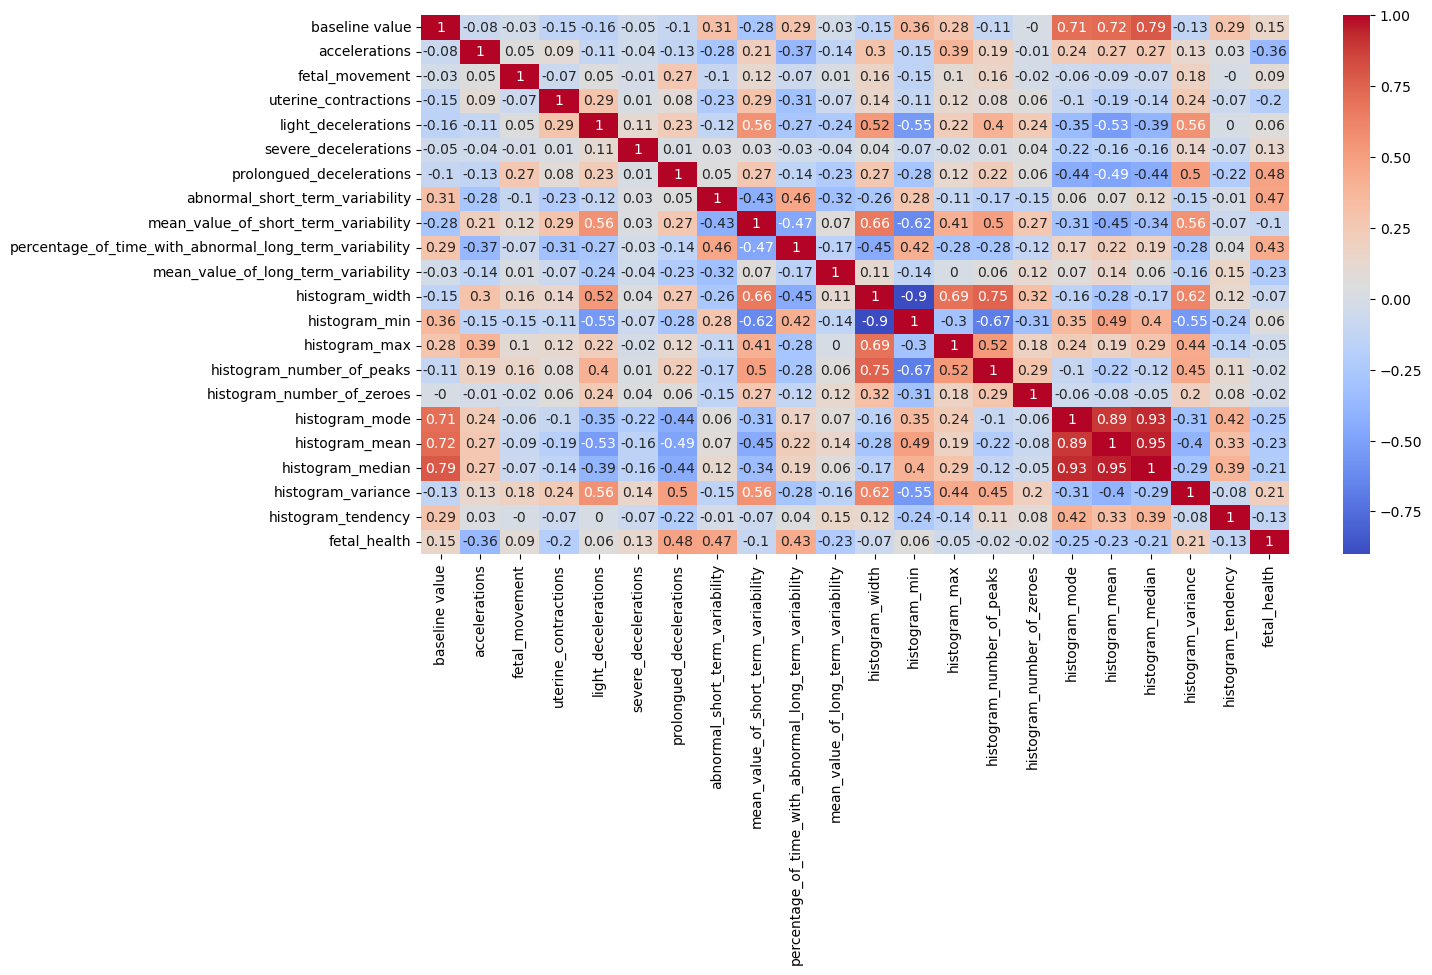

In [80]:
corr_metrics = df.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(corr_metrics, annot = True, cmap = 'coolwarm')
plt.show()

*Le feature histogram_mode, histogram_mean e histogram_median sono fortemente correlate l'una con l'altra e fortemente correlate con la feature baseline value: decido di eliminarle dal campione su cui applicare il modello*

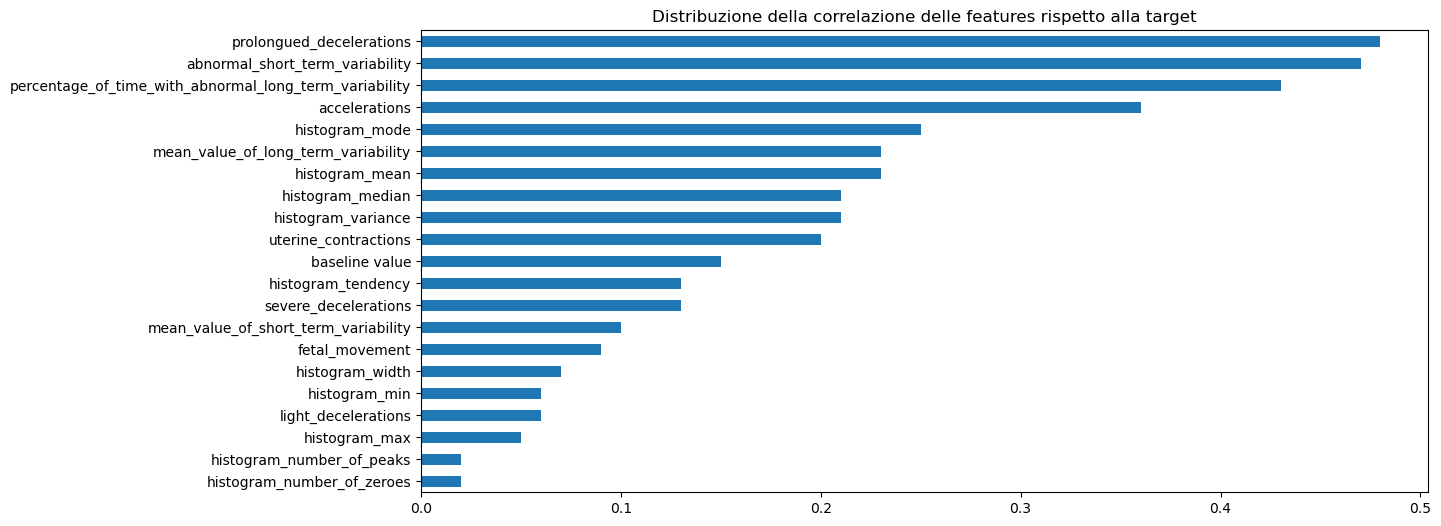

In [81]:
#stampo le correlazioni con la target in ordine di importanza in valore assoluto
plt.figure(figsize = (13,6))
plt.title('Distribuzione della correlazione delle features rispetto alla target')
abs(corr_metrics['fetal_health']).sort_values()[:-1].plot.barh()
plt.show()

In [82]:
#stampo le correlazioni con la target in ordine di importanza
Num_feature = corr_metrics["fetal_health"].sort_values(ascending=False).to_frame()

cm = sns.light_palette("#5F9EA0", as_cmap=True)

style = Num_feature.style.background_gradient(cmap=cm)
style

,fetal_health
fetal_health,1.000000
prolongued_decelerations,0.480000
abnormal_short_term_variability,0.470000
percentage_of_time_with_abnormal_long_term_variability,0.430000
histogram_variance,0.210000
baseline value,0.150000
severe_decelerations,0.130000
fetal_movement,0.090000
light_decelerations,0.060000
histogram_min,0.060000


*Analizzo singolarmente alcune features per identificare possibili relazioni con le classi target*

Parto dalla **baseline value** in quanto rappresenta la variabile di più immediata interpretazione, ovvero il battito cardiaco del feto

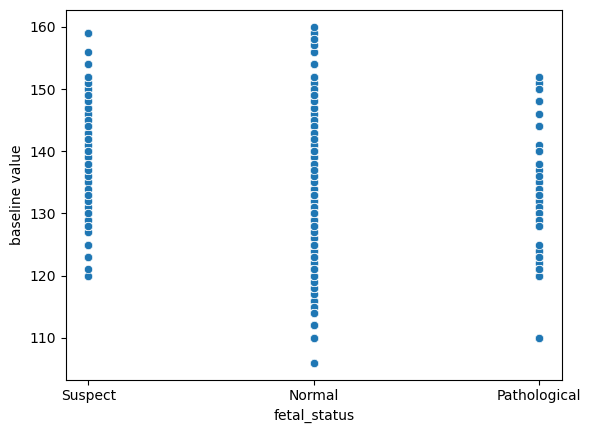

In [83]:
sns.scatterplot(x='fetal_status', y='baseline value', data=df);

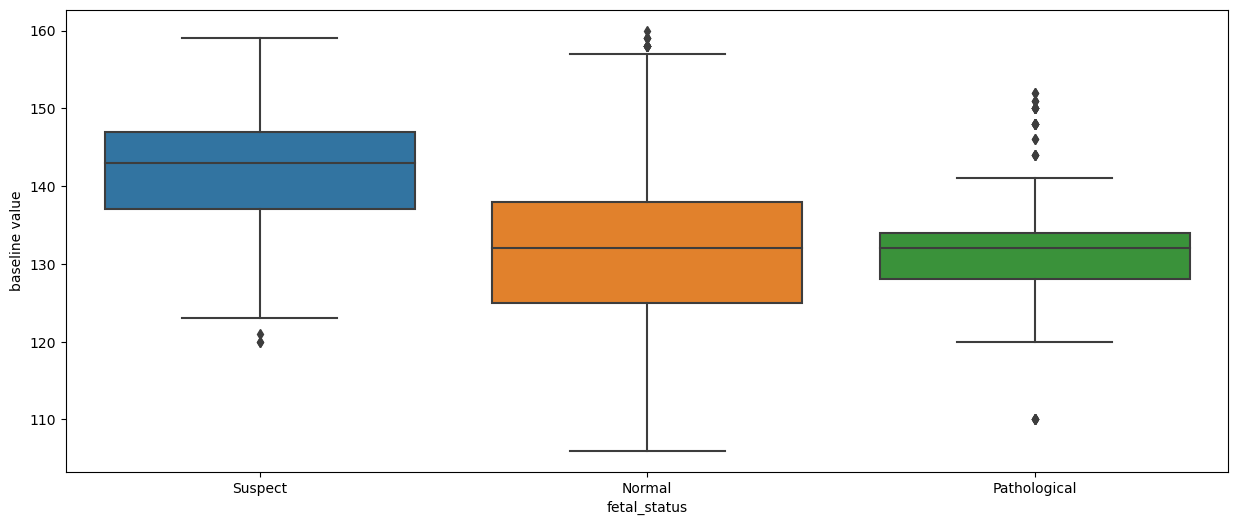

In [84]:
plt.figure(figsize=(15,6))
sns.boxplot(x='fetal_status', y='baseline value', data=df);

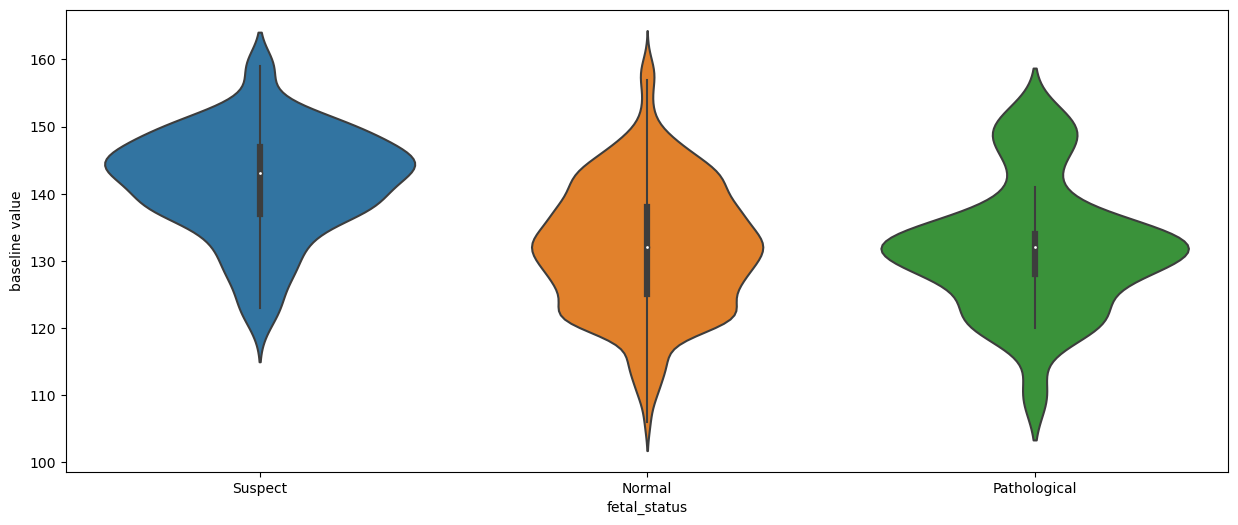

In [85]:
plt.figure(figsize=(15,6))
sns.violinplot(x='fetal_status', y='baseline value', data=df);

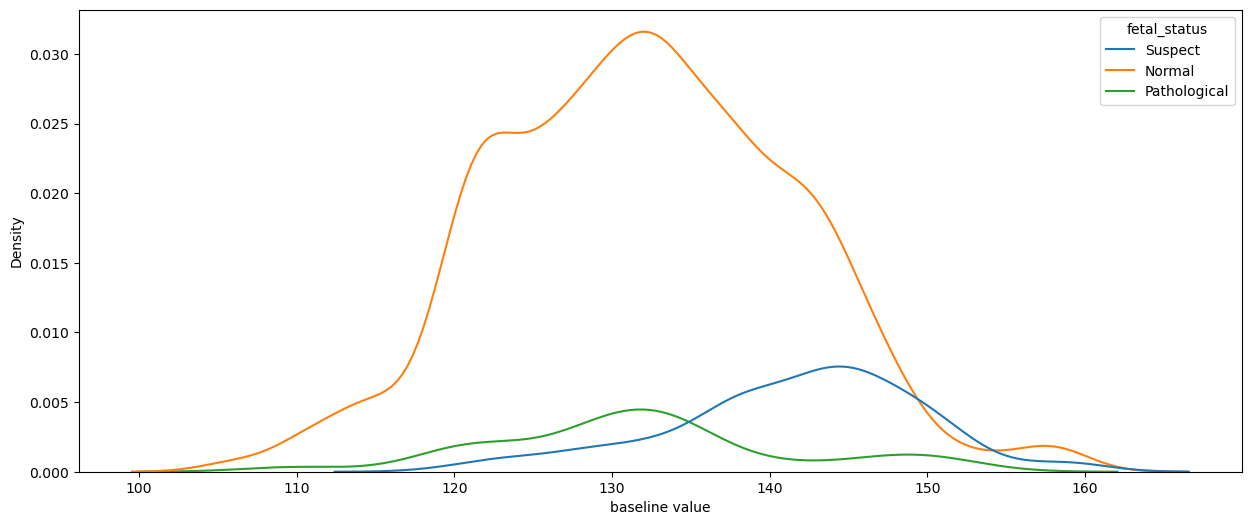

In [86]:
plt.figure(figsize=(15,6))
sns.kdeplot(data=df, x="baseline value", hue="fetal_status");
#plt.title('Distribuzione Battito Cardiaco', fontsize = 18);

*Dai grafici non sembrano emergere aspetti particolari che possano far prevedere la salute del feto in base al battito cardiaco, in linea con il grado di correlazione abbastanza basso della feature rispetto alla target (0,14)*

Provo allora ad analizzare le tre features con il grado più alto di correlazione

**1- Prolongued Decelerations**

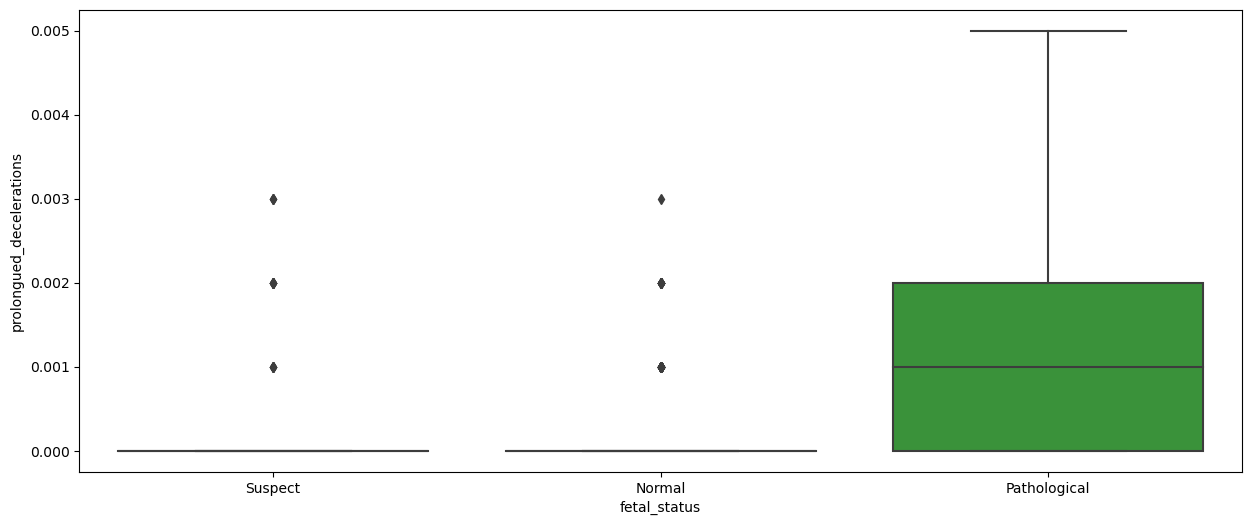

In [87]:
plt.figure(figsize=(15,6))
sns.boxplot(x='fetal_status', y='prolongued_decelerations', data=df);

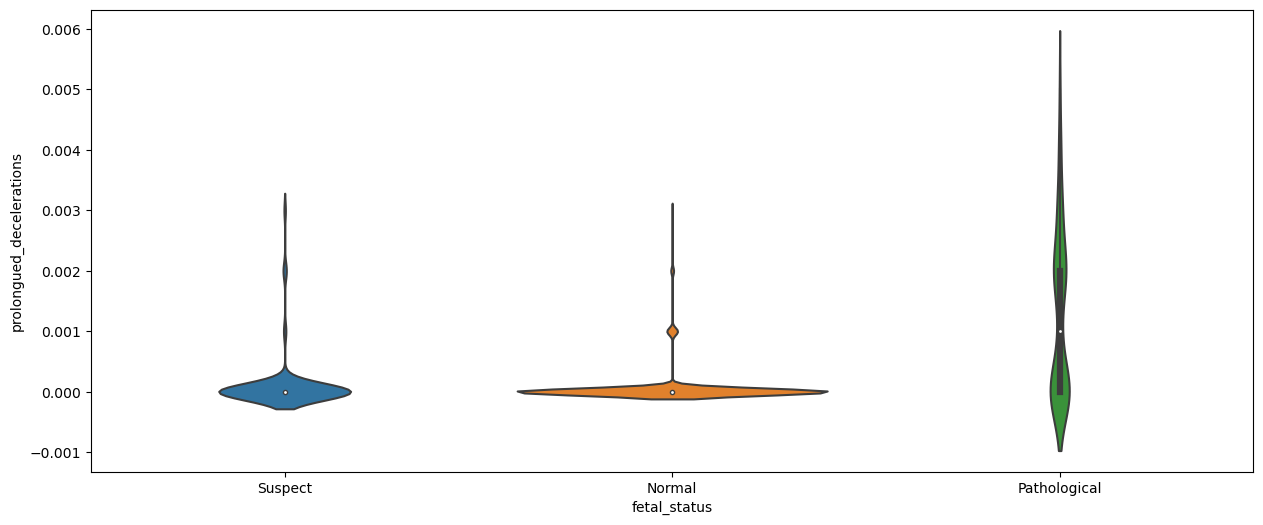

In [88]:
plt.figure(figsize=(15,6))
sns.violinplot(x='fetal_status', y='prolongued_decelerations', data=df);

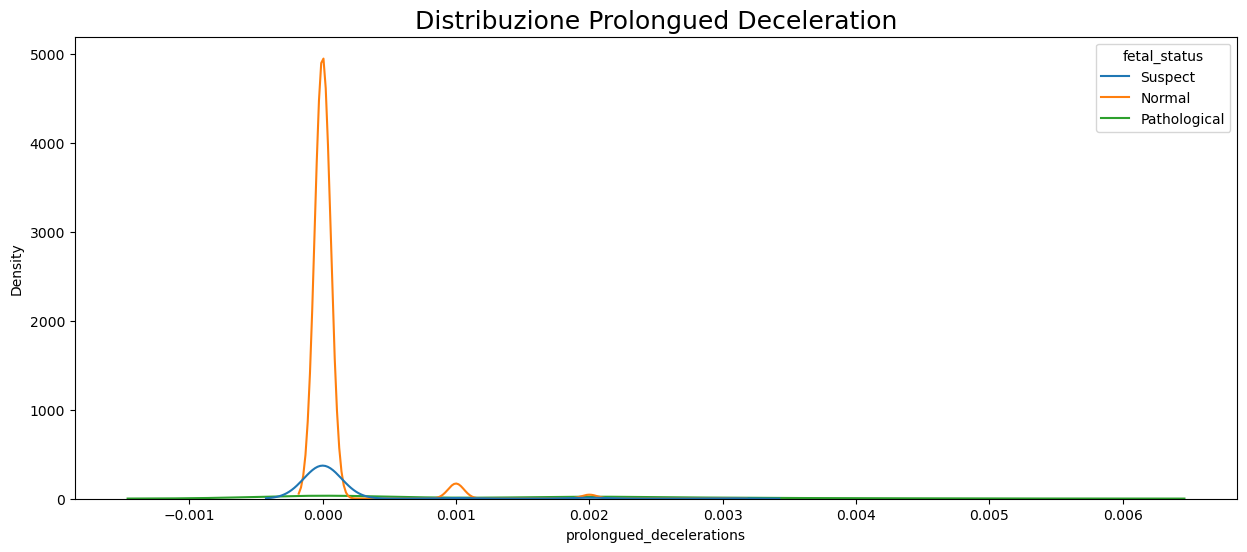

In [89]:
plt.figure(figsize=(15,6))
sns.kdeplot(data=df, x="prolongued_decelerations", hue="fetal_status")
plt.title('Distribuzione Prolongued Deceleration', fontsize = 18);

In [90]:
df.groupby('fetal_status')['prolongued_decelerations'].value_counts(normalize=True)*100

fetal_status  prolongued_decelerations
Normal        0.000                       95.830816
              0.001                        3.262840
              0.002                        0.845921
              0.003                        0.060423
Pathological  0.000                       46.590909
              0.002                       28.977273
              0.003                       11.363636
              0.001                        6.250000
              0.004                        5.113636
              0.005                        1.704545
Suspect       0.000                       94.915254
              0.002                        2.372881
              0.001                        1.694915
              0.003                        1.016949
Name: prolongued_decelerations, dtype: float64

*La variabile assume massimo 5 valori, e sembra evidenziare una certa differenza della classe Pathological rispetto alle altre due che si comportano invece in modo molto simile*

**2- Abnormal_short_term_variability**

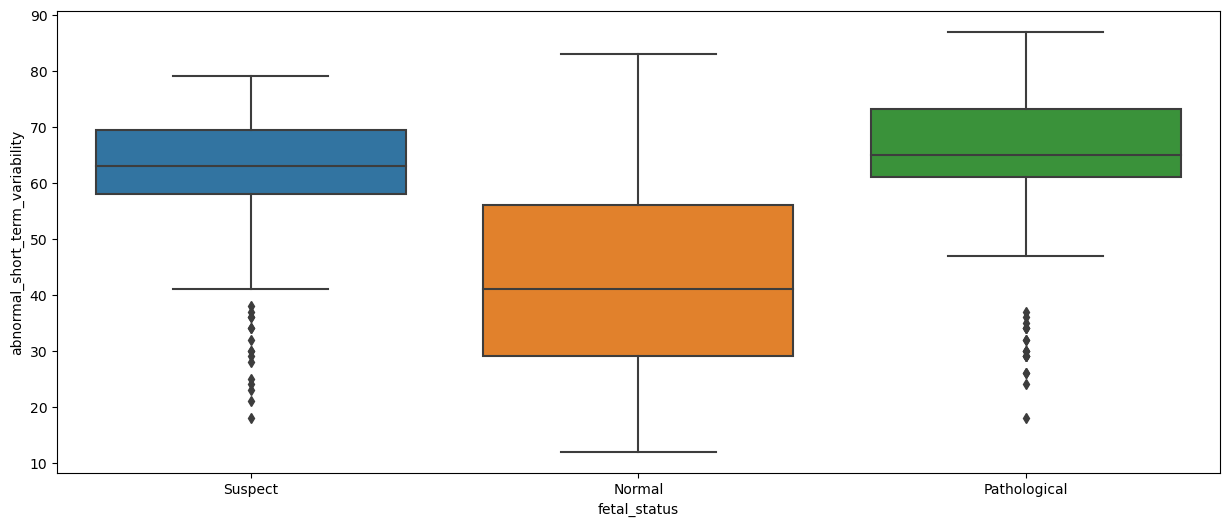

In [91]:
plt.figure(figsize=(15,6))
sns.boxplot(x='fetal_status', y='abnormal_short_term_variability', data=df);

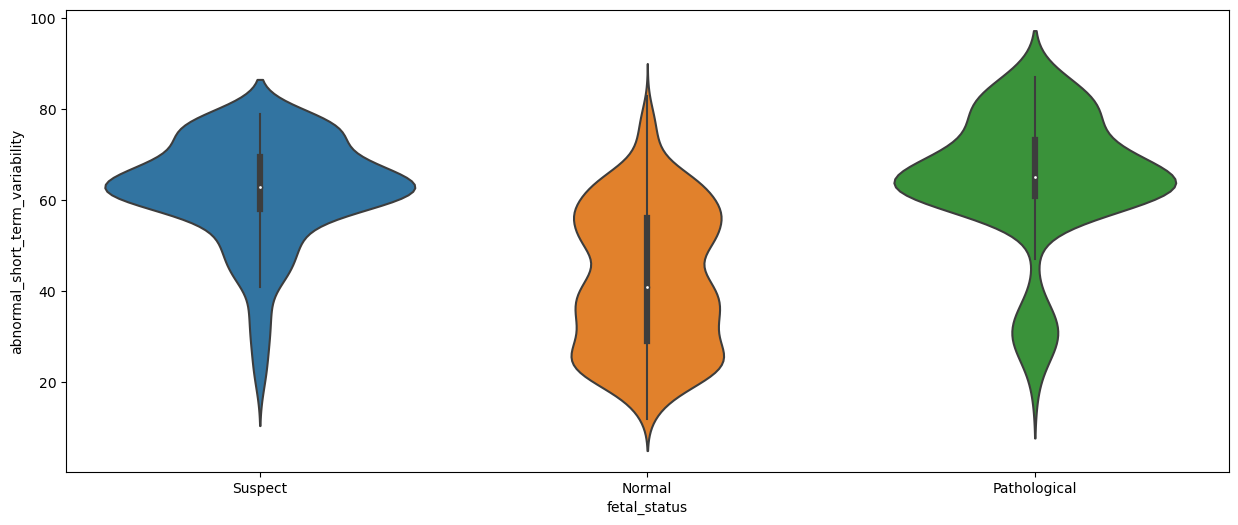

In [92]:
plt.figure(figsize=(15,6))
sns.violinplot(x='fetal_status', y='abnormal_short_term_variability', data=df);

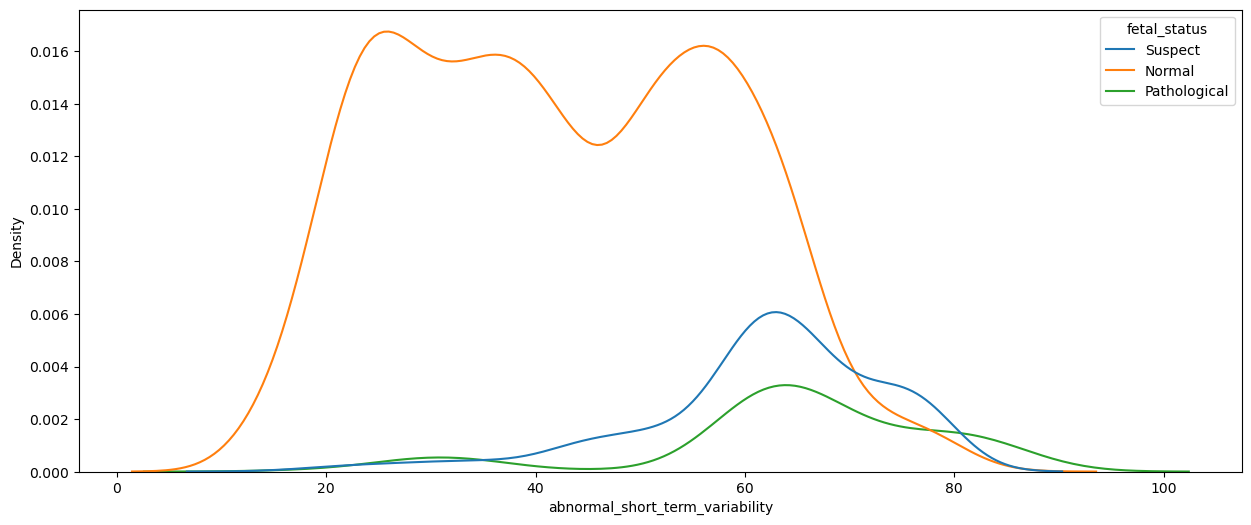

In [93]:
plt.figure(figsize=(15,6))
sns.kdeplot(data=df, x="abnormal_short_term_variability", hue="fetal_status");
#plt.title('Distribuzione Abnormal Short Term Variability', fontsize = 18);

*In questo caso la differenza tra la classe Normal e le altre due è ben più evidente: la maggior parte dei valori della Normal si concentra sotto un certo valore (circa 60) mentre, al contrario, la maggior parte dei valori delle altre due classi si concentra al di sopra di questo valore*

**3- Percentage_of_time_with_abnormal_long_term_variability**

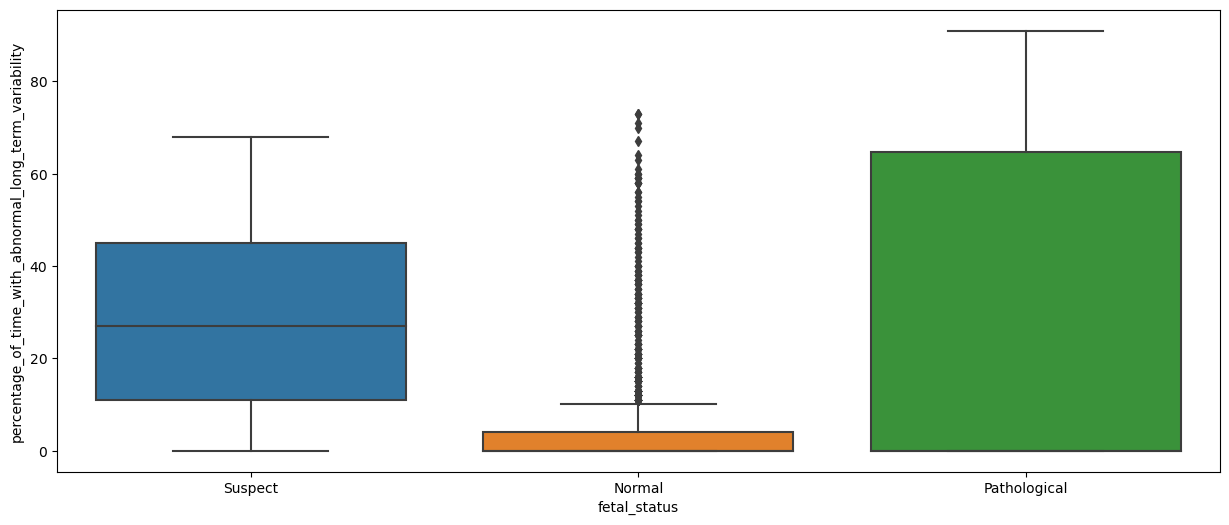

In [94]:
plt.figure(figsize=(15,6))
sns.boxplot(x='fetal_status', y='percentage_of_time_with_abnormal_long_term_variability', data=df);

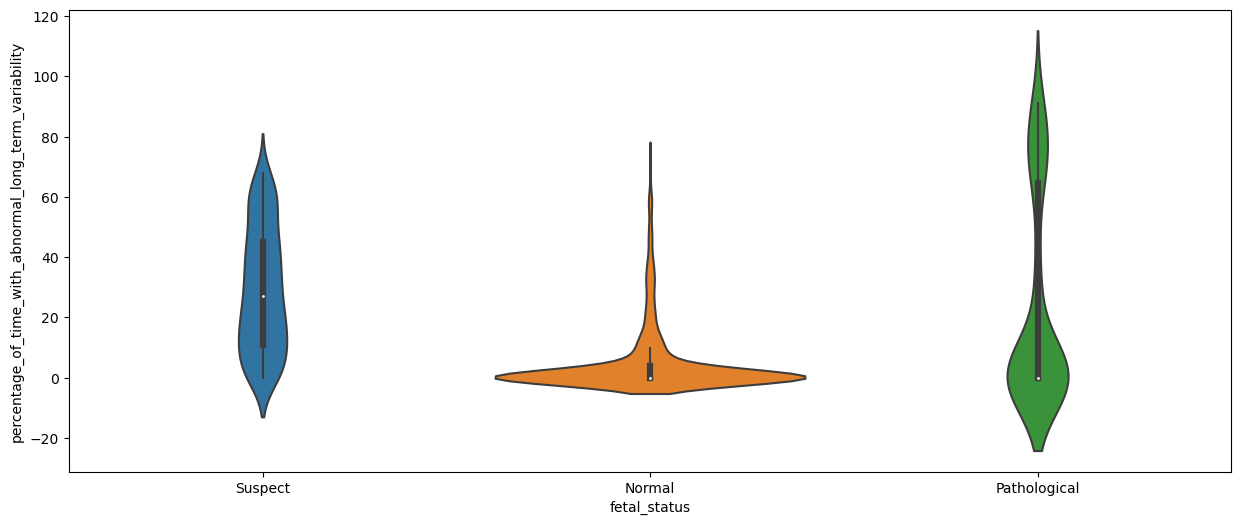

In [95]:
plt.figure(figsize=(15,6))
sns.violinplot(x='fetal_status', y='percentage_of_time_with_abnormal_long_term_variability', data=df);

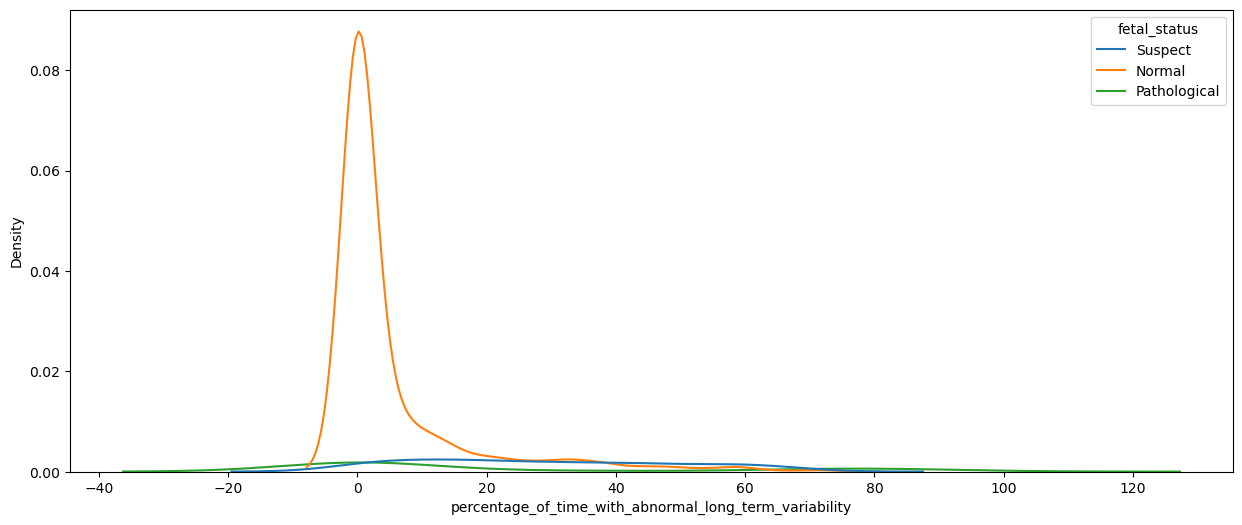

In [96]:
plt.figure(figsize=(15,6))
sns.kdeplot(data=df, x="percentage_of_time_with_abnormal_long_term_variability", hue="fetal_status");
#plt.title('Distribuzione % of Time with Abnormal Long Term Variability', fontsize = 18);

*Anche in questo caso la differenza tra classe Normal e le altre due è abbastanza evidente: la maggior parte dei valori della Normal si concentrano intorno al valore 0, mentre i valori delle altre classi si distribuiscono più omogeneamente fino a valori pari a 100 nel caso dei feti patologici*

Per completezza analizzo anche la feature con il maggior livello di correlazione inversa rispetto alla target: **Accelerations**

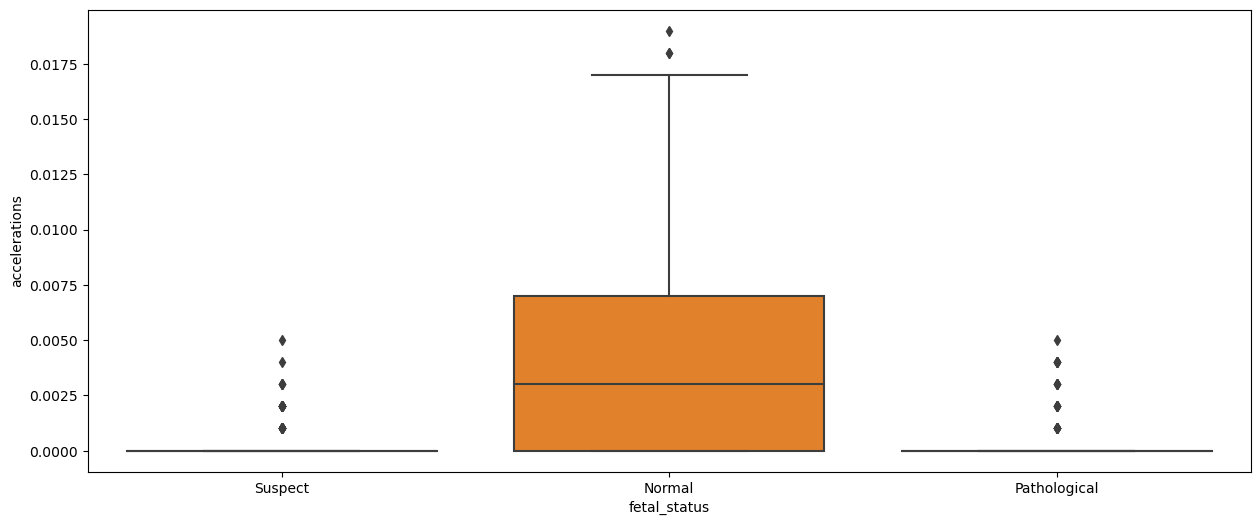

In [97]:
plt.figure(figsize=(15,6))
sns.boxplot(x='fetal_status', y='accelerations', data=df);

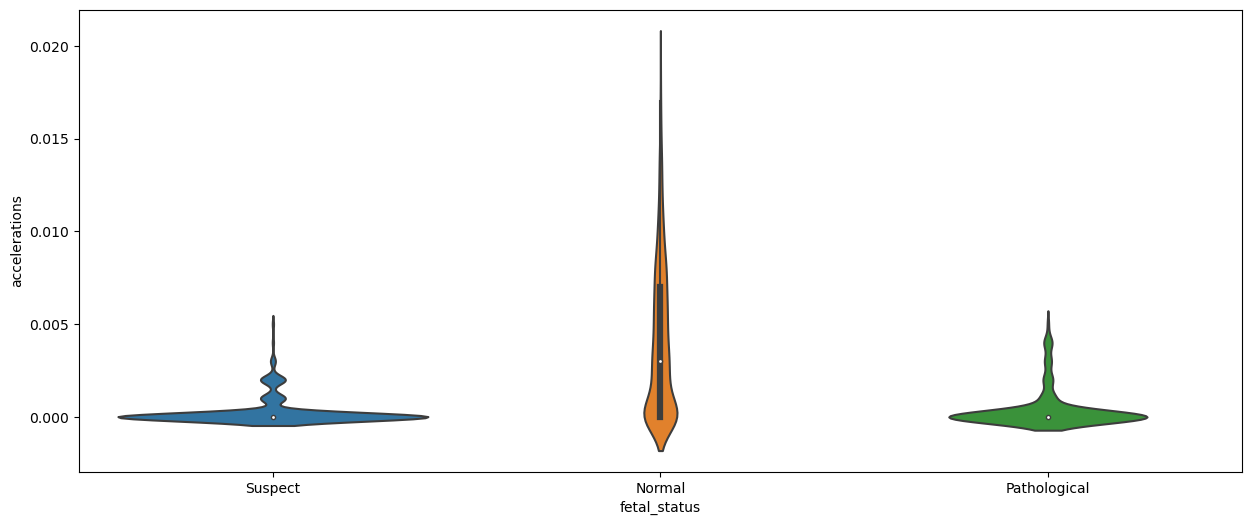

In [98]:
plt.figure(figsize=(15,6))
sns.violinplot(x='fetal_status', y='accelerations', data=df);

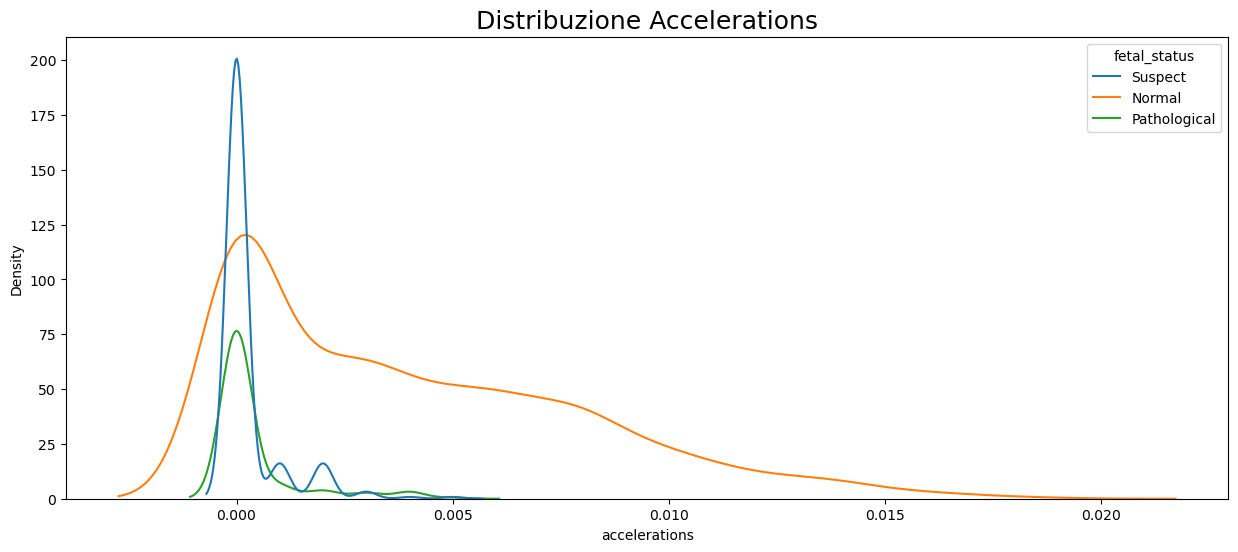

In [99]:
plt.figure(figsize=(15,6))
sns.kdeplot(data=df, x="accelerations", hue="fetal_status")
plt.title('Distribuzione Accelerations', fontsize = 18);

*In questo caso le classi Suspect e Pathological assumono principalmente valori intorno allo 0 mentre nella classe Normal i valori sono più distribuiti*

**FASE 3: SPLIT E SCALING DEL DATASET**

Effettuo split e scaling dei dati escludendo le tre variabili tra loro fortemente correlate

In [174]:
X = df.drop(["fetal_health","fetal_status","histogram_mode","histogram_mean","histogram_median"],axis=1)
y = df["fetal_status"]

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [102]:
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of testing label:', y_test.shape)

Shape of training feature: (1700, 18)
Shape of testing feature: (426, 18)
Shape of training label: (1700,)
Shape of testing label: (426,)


In [103]:
y_test.value_counts()

Normal          333
Suspect          64
Pathological     29
Name: fetal_status, dtype: int64

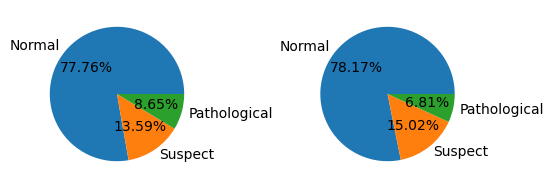

In [104]:
#verifico che la distribuzione delle classi in train e test sia coerente con la distribuzione dell'intero campione
plt.subplot(221);
plt.pie(y_train.value_counts(), labels=['Normal','Suspect','Pathological'], autopct='%.2f%%');
plt.subplot(222);
plt.pie(y_test.value_counts(), labels=['Normal','Suspect','Pathological'], autopct='%.2f%%');

In [176]:
#applico lo standard scaler per normalizzare i dati
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.818907,-0.824976,-0.204261,1.218555,-0.637350,-0.064301,-0.268148,-0.859657,-0.262589,-0.367038,0.829032,-0.500418,0.090151,-0.947494,-0.014607,-0.445313,-0.580514,-0.516697
1,0.692429,-0.824976,-0.204261,-1.159016,-0.637350,-0.064301,-0.268148,0.762723,-0.604484,1.233861,0.513834,1.267146,-0.482204,1.975298,1.686204,-0.445313,-0.545964,-0.516697
2,-1.121174,-0.824976,-0.204261,-1.498669,-0.296949,-0.064301,-0.268148,-1.554963,0.535166,-0.532648,0.969120,-0.807820,0.325826,-1.228531,-1.035093,-0.445313,-0.545964,-0.516697
3,0.390162,0.464049,-0.204261,0.199596,0.043451,-0.064301,-0.268148,-0.627888,-0.490519,-0.532648,-0.571847,-0.193016,0.729841,0.794940,-0.014607,-0.445313,-0.338667,-0.516697
4,0.893941,-0.051561,-0.204261,-0.140057,-0.637350,-0.064301,-0.268148,-0.048467,-0.718449,0.957844,-0.414248,-1.140840,1.335863,-0.273003,-1.035093,-0.445313,-0.615063,-0.516697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,-0.315128,1.495268,-0.183561,-0.140057,-0.296949,-0.064301,-0.268148,0.299186,-0.034659,-0.532648,-1.027133,0.729192,-0.684211,0.457695,0.665717,-0.445313,-0.096820,1.119029
1696,-1.020419,2.268683,-0.204261,-0.819363,-0.637350,-0.064301,-0.268148,-1.439078,0.991026,-0.532648,-0.274160,-0.474801,0.224822,-0.666456,-0.694931,-0.445313,-0.511415,-0.516697
1697,-1.121174,0.464049,-0.204261,-0.140057,1.064653,-0.064301,-0.268148,-1.554963,1.446887,-0.532648,1.652049,0.703575,-1.121894,-0.329211,0.665717,-0.445313,0.421423,-0.516697
1698,-1.826465,-0.051561,-0.204261,1.218555,0.043451,-0.064301,1.383487,-1.323194,0.307236,-0.532648,0.321213,0.959744,-0.751547,0.851147,-0.354769,2.444122,0.905117,-0.516697


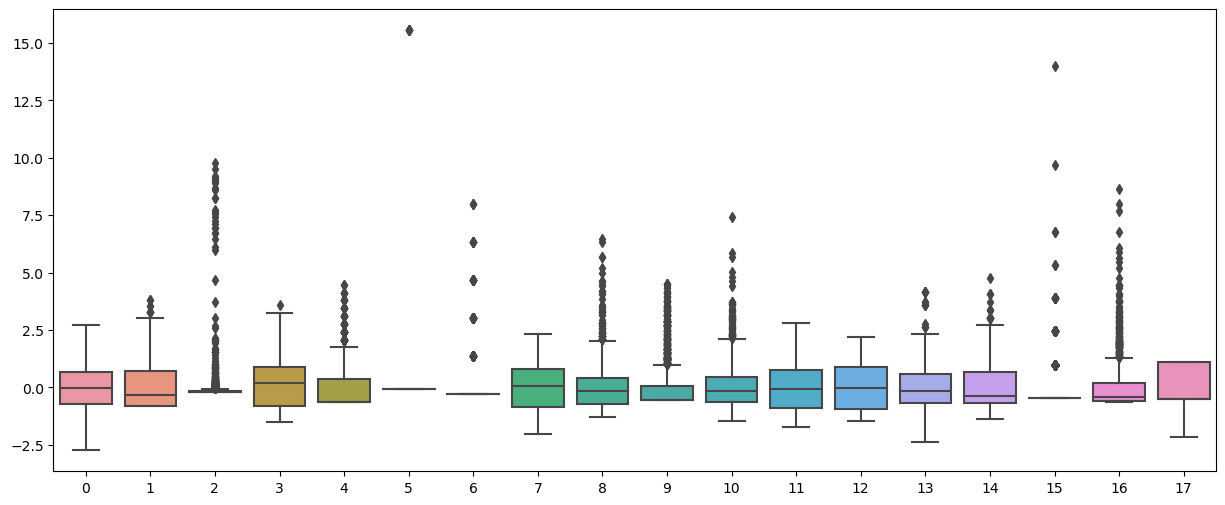

In [106]:
#avendo normalizzato i dati posso plottarli tutti insieme in un unico boxplot per confrontarne la distribuzione
dati_box = pd.DataFrame(X_train)
plt.figure(figsize=(15,6))
sns.boxplot(data=dati_box);

*Da questo grafico la feature 5 (corrispondente a severe_decelerations) sembra avere un outlier, per cui la controllo*

In [130]:
df['severe_decelerations'].value_counts()

0.000    2119
0.001       7
Name: severe_decelerations, dtype: int64

*In realtà guardando il dato effettivo la differenza non è così evidente e si tratta comunque di pochissime osservazioni per cui decido di non alterare i dati*

**FASE 4: APPLICAZIONE DEI MODELLI DI MACHINE LEARNING**

Scelgo di applicare 4 modelli (2 semplici e 2 più complessi):

Logistic Regression, KNN, Random Forest, XGBoost

**1- Logistic Regression**

Accuracy 0.8873239436619719
Precision 0.8867263237888185
Recall 0.8873239436619719
F1 score 0.8870171767836831


C:\Users\matte\anaconda3\envs\master_na\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


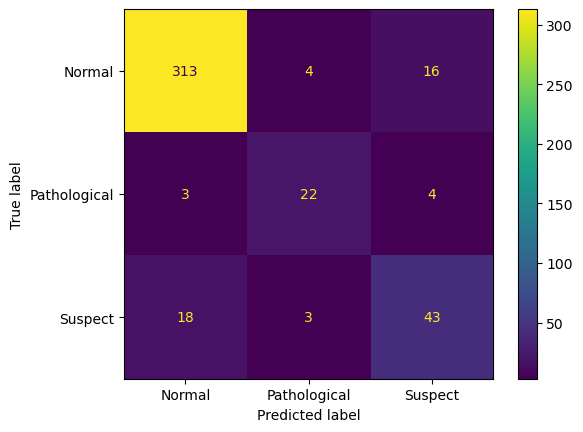

In [177]:
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print("Accuracy",accuracy_score(y_test, y_pred))
print("Precision", precision_score(y_test, y_pred, average='weighted'))
print("Recall",recall_score(y_test, y_pred, average='weighted'))
print("F1 score",f1_score(y_test, y_pred, average='weighted'))
plot_confusion_matrix(clf,X_test, y_test);

**2- KNN**

Accuracy 0.903755868544601
Precision 0.8996039111499314
Recall 0.903755868544601
F1 score 0.9006944545099573


C:\Users\matte\anaconda3\envs\master_na\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


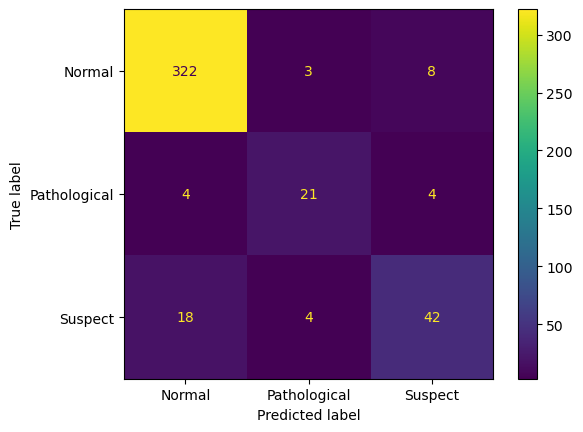

In [178]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)
y_pred=neigh.predict(X_test)
print("Accuracy",accuracy_score(y_test, y_pred))
print("Precision", precision_score(y_test, y_pred, average='weighted'))
print("Recall",recall_score(y_test, y_pred, average='weighted'))
print("F1 score",f1_score(y_test, y_pred, average='weighted'))
plot_confusion_matrix(neigh,X_test, y_test);

**3- Random Forest**

Accuracy 0.9248826291079812
Precision 0.9237408909036408
Recall 0.9248826291079812
F1 score 0.9209387028245005


C:\Users\matte\anaconda3\envs\master_na\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


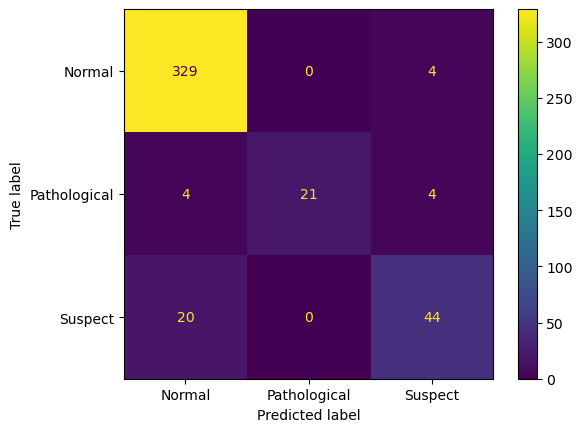

In [179]:
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42)
rnd_clf.fit(X_train, y_train)
y_pred = rnd_clf.predict(X_test)
print("Accuracy",accuracy_score(y_test, y_pred))
print("Precision", precision_score(y_test, y_pred, average='weighted'))
print("Recall",recall_score(y_test, y_pred, average='weighted'))
print("F1 score",f1_score(y_test, y_pred, average='weighted'))
plot_confusion_matrix(rnd_clf,X_test, y_test);

**4- XGBoost**

In [180]:
#per usare XGBoost devo applicare iniziale pre-processing in quanto modello richede che class column inizi dal valore 0 (as required since version 1.3.2)
le = LabelEncoder()
y_train_xg = le.fit_transform(y_train)

In [181]:
xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=42)
xgb_model.fit(X_train, y_train_xg)
y_pred_xg = xgb_model.predict(X_test)
y_pred_xg = le.inverse_transform(y_pred_xg)

In [182]:
print("Accuracy",accuracy_score(y_test, y_pred_xg))
print("Precision", precision_score(y_test, y_pred_xg, average='weighted'))
print("Recall",recall_score(y_test, y_pred_xg, average='weighted'))
print("F1 score",f1_score(y_test, y_pred_xg, average='weighted'))

Accuracy 0.9530516431924883
Precision 0.9534127843986998
Recall 0.9530516431924883
F1 score 0.9532039236643853


In [183]:
print(confusion_matrix(y_test, y_pred_xg))

[[323   0  10]
 [  1  28   0]
 [  9   0  55]]


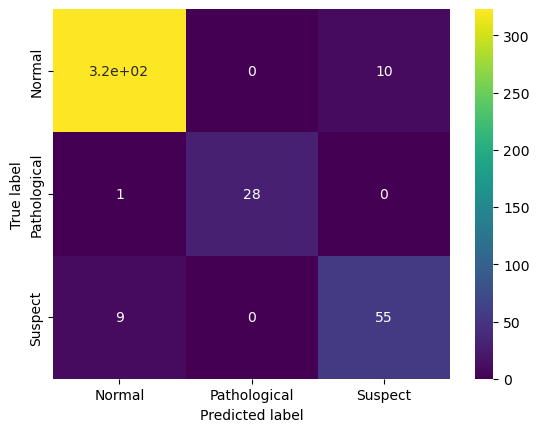

In [184]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred_xg), annot=True, ax = ax, cmap = "viridis");

# labels, title and ticks
ax.set_xlabel("Predicted label");
ax.set_ylabel("True label"); 
ax.xaxis.set_ticklabels(["Normal", "Pathological", "Suspect"])
ax.yaxis.set_ticklabels(["Normal", "Pathological", "Suspect"]);

In [185]:
print('\t\tCLASSIFICATIION METRICS "XGBoost":\n')
print(classification_report(y_test, y_pred_xg,
    target_names= ["Normal", "Pathological", "Suspect"]))

		CLASSIFICATIION METRICS "XGBoost":

              precision    recall  f1-score   support

      Normal       0.97      0.97      0.97       333
Pathological       1.00      0.97      0.98        29
     Suspect       0.85      0.86      0.85        64

    accuracy                           0.95       426
   macro avg       0.94      0.93      0.94       426
weighted avg       0.95      0.95      0.95       426



In [186]:
modelli = [
LogisticRegression(random_state=42),
KNeighborsClassifier(n_neighbors=5),
RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42)
]



entries = []
for modello in modelli:
    nome_modello = modello.__class__.__name__
    clsffit = modello.fit(X_train,y_train)
    print('\t\tCLASSIFICATIION METRICS "{}":\n'.format(nome_modello))
    print(classification_report(y_test, modello.predict(X_test),
    target_names= ["Normal", "Pathological", "Suspect"]))

		CLASSIFICATIION METRICS "LogisticRegression":

              precision    recall  f1-score   support

      Normal       0.94      0.94      0.94       333
Pathological       0.76      0.76      0.76        29
     Suspect       0.68      0.67      0.68        64

    accuracy                           0.89       426
   macro avg       0.79      0.79      0.79       426
weighted avg       0.89      0.89      0.89       426

		CLASSIFICATIION METRICS "KNeighborsClassifier":

              precision    recall  f1-score   support

      Normal       0.94      0.97      0.95       333
Pathological       0.75      0.72      0.74        29
     Suspect       0.78      0.66      0.71        64

    accuracy                           0.90       426
   macro avg       0.82      0.78      0.80       426
weighted avg       0.90      0.90      0.90       426

		CLASSIFICATIION METRICS "RandomForestClassifier":

              precision    recall  f1-score   support

      Normal       0.93      0

*Il modello che consente di ottenere la performance migliore è XGBoost con una accuracy del 95%*

**FASE 5: TUNING DEL MODELLO**

Provo a fare fine tuning del modello che ha fatto registrare la performance migliore (**XGBoost**) tramite le seguenti quattro analisi:

- Feature Importance
- Grid Search
- Resample dei dati
- Ensemble dei modelli

**1- Feature importance**

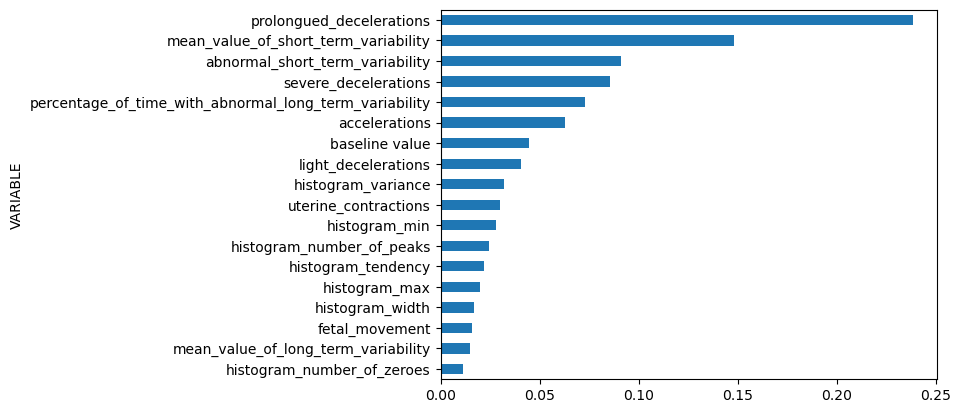

In [187]:
#analizzo le features che hanno impattato maggiormente sul modello tramite feature_importance
importances = xgb_model.feature_importances_
tmp = pd.DataFrame({"IMPORTANCE":importances, "VARIABLE": X.columns}).sort_values("IMPORTANCE", ascending=True)
tmp.set_index("VARIABLE")["IMPORTANCE"].plot(kind="barh")
plt.show()

In [188]:
#provo a fare selezione di solo alcune features e riapplicare il modello
df2 = df[['prolongued_decelerations','mean_value_of_short_term_variability','abnormal_short_term_variability','severe_decelerations','percentage_of_time_with_abnormal_long_term_variability','accelerations','baseline value','light_decelerations']]
X2 = df2
y2 = df["fetal_status"]
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.20, random_state=42)

In [189]:
scaler = StandardScaler()
X_train2 = scaler.fit_transform(X_train2)
X_test2 = scaler.transform(X_test2)

In [190]:
le = LabelEncoder()
y_train_xg2 = le.fit_transform(y_train2)
xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=42)
xgb_model.fit(X_train2, y_train_xg2)
y_pred_xg2 = xgb_model.predict(X_test2)
y_pred_xg2 = le.inverse_transform(y_pred_xg2)
print("Accuracy",accuracy_score(y_test2, y_pred_xg2))
print("Precision", precision_score(y_test2, y_pred_xg2, average='weighted'))
print("Recall",recall_score(y_test2, y_pred_xg2, average='weighted'))
print("F1 score",f1_score(y_test2, y_pred_xg2, average='weighted'))

Accuracy 0.9483568075117371
Precision 0.9473220586799371
Recall 0.9483568075117371
F1 score 0.9474347457662813


In [191]:
print('\t\tCLASSIFICATIION METRICS "XGBoost - Feature Importance":\n')
print(classification_report(y_test2, y_pred_xg2,
    target_names= ["Normal", "Pathological", "Suspect"]))

		CLASSIFICATIION METRICS "XGBoost - Feature Importance":

              precision    recall  f1-score   support

      Normal       0.96      0.97      0.97       333
Pathological       0.94      1.00      0.97        29
     Suspect       0.88      0.80      0.84        64

    accuracy                           0.95       426
   macro avg       0.93      0.92      0.92       426
weighted avg       0.95      0.95      0.95       426



In [192]:
print(confusion_matrix(y_test, y_pred_xg2))

[[324   2   7]
 [  0  29   0]
 [ 13   0  51]]


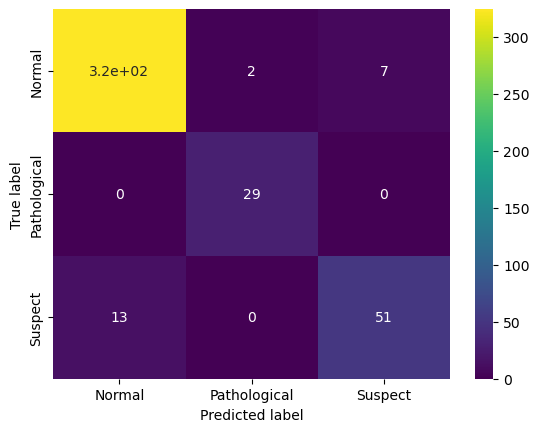

In [193]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred_xg2), annot=True, ax = ax, cmap = "viridis");

# labels, title and ticks
ax.set_xlabel("Predicted label");
ax.set_ylabel("True label"); 
ax.xaxis.set_ticklabels(["Normal", "Pathological", "Suspect"])
ax.yaxis.set_ticklabels(["Normal", "Pathological", "Suspect"]);

*Facendo selezione di solo alcune feature il modello conferma le performance*

**2- Grid Search**

In [155]:
#verifico quali sono i parametri del modello
?XGBClassifier

In [194]:
#applico la grid search
#definisco il range di parametri
param_grid = {'max_depth': range (2, 10, 1),
              'n_estimators': range(60, 220, 40),
              'learning_rate': [0.1, 0.05, 0.01]}
 
grid = GridSearchCV(XGBClassifier(), param_grid, refit = True, verbose = 3)
 
#faccio il fit del modello per la grid search
grid.fit(X_train, y_train_xg)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV 1/5] END learning_rate=0.1, max_depth=2, n_estimators=60;, score=0.921 total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=2, n_estimators=60;, score=0.932 total time=   0.0s
[CV 3/5] END learning_rate=0.1, max_depth=2, n_estimators=60;, score=0.926 total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=2, n_estimators=60;, score=0.924 total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=2, n_estimators=60;, score=0.944 total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=2, n_estimators=100;, score=0.926 total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=2, n_estimators=100;, score=0.926 total time=   0.0s
[CV 3/5] END learning_rate=0.1, max_depth=2, n_estimators=100;, score=0.932 total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=2, n_estimators=100;, score=0.926 total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=2, n_estimators=100;, score=0.941 total time= 

[CV 3/5] END learning_rate=0.1, max_depth=6, n_estimators=100;, score=0.941 total time=   0.1s
[CV 4/5] END learning_rate=0.1, max_depth=6, n_estimators=100;, score=0.935 total time=   0.1s
[CV 5/5] END learning_rate=0.1, max_depth=6, n_estimators=100;, score=0.953 total time=   0.1s
[CV 1/5] END learning_rate=0.1, max_depth=6, n_estimators=140;, score=0.941 total time=   0.2s
[CV 2/5] END learning_rate=0.1, max_depth=6, n_estimators=140;, score=0.944 total time=   0.2s
[CV 3/5] END learning_rate=0.1, max_depth=6, n_estimators=140;, score=0.941 total time=   0.1s
[CV 4/5] END learning_rate=0.1, max_depth=6, n_estimators=140;, score=0.938 total time=   0.1s
[CV 5/5] END learning_rate=0.1, max_depth=6, n_estimators=140;, score=0.953 total time=   0.1s
[CV 1/5] END learning_rate=0.1, max_depth=6, n_estimators=180;, score=0.941 total time=   0.2s
[CV 2/5] END learning_rate=0.1, max_depth=6, n_estimators=180;, score=0.944 total time=   0.2s
[CV 3/5] END learning_rate=0.1, max_depth=6, n_est

[CV 1/5] END learning_rate=0.05, max_depth=2, n_estimators=180;, score=0.921 total time=   0.1s
[CV 2/5] END learning_rate=0.05, max_depth=2, n_estimators=180;, score=0.932 total time=   0.0s
[CV 3/5] END learning_rate=0.05, max_depth=2, n_estimators=180;, score=0.929 total time=   0.0s
[CV 4/5] END learning_rate=0.05, max_depth=2, n_estimators=180;, score=0.929 total time=   0.0s
[CV 5/5] END learning_rate=0.05, max_depth=2, n_estimators=180;, score=0.938 total time=   0.1s
[CV 1/5] END learning_rate=0.05, max_depth=3, n_estimators=60;, score=0.929 total time=   0.0s
[CV 2/5] END learning_rate=0.05, max_depth=3, n_estimators=60;, score=0.938 total time=   0.0s
[CV 3/5] END learning_rate=0.05, max_depth=3, n_estimators=60;, score=0.929 total time=   0.0s
[CV 4/5] END learning_rate=0.05, max_depth=3, n_estimators=60;, score=0.926 total time=   0.0s
[CV 5/5] END learning_rate=0.05, max_depth=3, n_estimators=60;, score=0.947 total time=   0.0s
[CV 1/5] END learning_rate=0.05, max_depth=3,

[CV 2/5] END learning_rate=0.05, max_depth=7, n_estimators=60;, score=0.938 total time=   0.1s
[CV 3/5] END learning_rate=0.05, max_depth=7, n_estimators=60;, score=0.929 total time=   0.1s
[CV 4/5] END learning_rate=0.05, max_depth=7, n_estimators=60;, score=0.935 total time=   0.1s
[CV 5/5] END learning_rate=0.05, max_depth=7, n_estimators=60;, score=0.950 total time=   0.1s
[CV 1/5] END learning_rate=0.05, max_depth=7, n_estimators=100;, score=0.944 total time=   0.2s
[CV 2/5] END learning_rate=0.05, max_depth=7, n_estimators=100;, score=0.932 total time=   0.2s
[CV 3/5] END learning_rate=0.05, max_depth=7, n_estimators=100;, score=0.938 total time=   0.3s
[CV 4/5] END learning_rate=0.05, max_depth=7, n_estimators=100;, score=0.941 total time=   0.3s
[CV 5/5] END learning_rate=0.05, max_depth=7, n_estimators=100;, score=0.953 total time=   0.3s
[CV 1/5] END learning_rate=0.05, max_depth=7, n_estimators=140;, score=0.947 total time=   0.4s
[CV 2/5] END learning_rate=0.05, max_depth=7

[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.915 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.900 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.944 total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=140;, score=0.918 total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=140;, score=0.926 total time=   0.1s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=140;, score=0.915 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=140;, score=0.906 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=140;, score=0.941 total time=   0.1s
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=180;, score=0.918 total time=   0.1s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=180;, score=0.941 total time=   0.1s
[CV 3/5] END learning_rate=0.01, max_dep

[CV 4/5] END learning_rate=0.01, max_depth=7, n_estimators=140;, score=0.932 total time=   0.3s
[CV 5/5] END learning_rate=0.01, max_depth=7, n_estimators=140;, score=0.953 total time=   0.2s
[CV 1/5] END learning_rate=0.01, max_depth=7, n_estimators=180;, score=0.926 total time=   0.3s
[CV 2/5] END learning_rate=0.01, max_depth=7, n_estimators=180;, score=0.932 total time=   0.3s
[CV 3/5] END learning_rate=0.01, max_depth=7, n_estimators=180;, score=0.932 total time=   0.3s
[CV 4/5] END learning_rate=0.01, max_depth=7, n_estimators=180;, score=0.932 total time=   0.3s
[CV 5/5] END learning_rate=0.01, max_depth=7, n_estimators=180;, score=0.956 total time=   0.4s
[CV 1/5] END learning_rate=0.01, max_depth=8, n_estimators=60;, score=0.932 total time=   0.1s
[CV 2/5] END learning_rate=0.01, max_depth=8, n_estimators=60;, score=0.926 total time=   0.1s
[CV 3/5] END learning_rate=0.01, max_depth=8, n_estimators=60;, score=0.926 total time=   0.1s
[CV 4/5] END learning_rate=0.01, max_depth=

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_

In [195]:
#stampo i best parameter dopo il tuning
print(grid.best_params_)
 
#stampo il modello dopo aver fatto tuning degli hyper-parametri
print(grid.best_estimator_)

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 140}
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=140, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)


In [196]:
grid_predictions = grid.predict(X_test)
grid_predictions

array([0, 0, 0, 0, 0, 1, 0, 1, 2, 2, 0, 1, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 2, 0, 2, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 2, 0, 0, 0, 2, 2, 0, 0, 1, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 1, 0,
       2, 2, 0, 2, 0, 1, 0, 0, 2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0,
       2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [197]:
grid_predictions = le.inverse_transform(grid_predictions)
grid_predictions

array(['Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Pathological',
       'Normal', 'Pathological', 'Suspect', 'Suspect', 'Normal',
       'Pathological', 'Normal', 'Normal', 'Normal', 'Normal', 'Suspect',
       'Normal', 'Suspect', 'Normal', 'Normal', 'Normal', 'Pathological',
       'Normal', 'Normal', 'Pathological', 'Pathological', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Suspect',
       'Normal', 'Normal', 'Normal', 'Pathological', 'Suspect', 'Suspect',
       'Normal', 'Suspect', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Pathological', 'Normal', 'Normal', 'Normal', 'Normal',
       'Suspect', 'Suspect', 'Suspect', 'Normal', 'Normal', 'Normal',
       'Suspect', 'Normal', 'Suspect', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Suspect', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Suspect',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'N

In [198]:
print("Accuracy",accuracy_score(y_test, grid_predictions))
print("Precision", precision_score(y_test, grid_predictions, average='weighted'))
print("Recall",recall_score(y_test, grid_predictions, average='weighted'))
print("F1 score",f1_score(y_test, grid_predictions, average='weighted'))

Accuracy 0.9436619718309859
Precision 0.9432948156377081
Recall 0.9436619718309859
F1 score 0.9433364420909092


In [199]:
print(confusion_matrix(y_test, grid_predictions))

[[323   0  10]
 [  2  27   0]
 [ 12   0  52]]


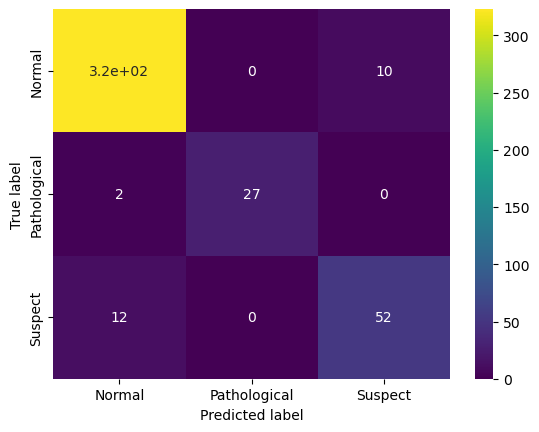

In [200]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, grid_predictions), annot=True, ax = ax, cmap = "viridis");

# labels, title and ticks
ax.set_xlabel("Predicted label");
ax.set_ylabel("True label"); 
ax.xaxis.set_ticklabels(["Normal", "Pathological", "Suspect"])
ax.yaxis.set_ticklabels(["Normal", "Pathological", "Suspect"]);

In [201]:
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

      Normal       0.96      0.97      0.96       333
Pathological       1.00      0.93      0.96        29
     Suspect       0.84      0.81      0.83        64

    accuracy                           0.94       426
   macro avg       0.93      0.90      0.92       426
weighted avg       0.94      0.94      0.94       426



*Con questa Grid Search il modello non migliora!*

*In questo caso ho testato la Grid Search direttamente sul test set ma questo non è il metodo più corretto, dovrei infatti splittare nuovamente il dataset così da avere tre set: il training per allenare il modello, il validation per selezionare gli iper-parametri e il test per valutarne le performance*

**3- Resample dei dati**

Come evidenziato all'inizio il dataset è molto sbilanciato verso la classe Normal, provo allora ad applicare diversi metodi di resample per ribilanciare le osservazioni e vedere se le performance del modello migliorano

**Primo metodo: Sotto Campionamento classe di maggioranza**

Le osservazioni della classe di maggioranza vengono rimosse casualmente per ridurre la sua influenza sul modello

In [202]:
#applico RandomUnderSampler, faccio fit dei dati di training e applico XGBClassifier
rus= RandomUnderSampler()
X_train_rus, y_train_xg_rus = rus.fit_resample(X_train, y_train_xg)
xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=42).fit(X_train_rus, y_train_xg_rus)
#faccio la predizione sui dati di test
y_pred_xg_rus = xgb_model.predict(X_test)
y_pred_xg_rus = le.inverse_transform(y_pred_xg_rus)
#stampo metriche di performance
print("Accuracy",accuracy_score(y_test, y_pred_xg_rus))
print("Precision", precision_score(y_test, y_pred_xg_rus, average='weighted'))
print("Recall",recall_score(y_test, y_pred_xg_rus, average='weighted'))
print("F1 score",f1_score(y_test, y_pred_xg_rus, average='weighted'))

Accuracy 0.8755868544600939
Precision 0.9088833712143289
Recall 0.8755868544600939
F1 score 0.88310059788933


In [209]:
print(confusion_matrix(y_test, y_pred_xg_rus))

[[286  13  34]
 [  0  29   0]
 [  5   1  58]]


In [204]:
print('\t\tCLASSIFICATIION METRICS "XGBoost - Sotto Campionamento":\n')
print(classification_report(y_test, y_pred_xg_rus,
    target_names= ["Normal", "Pathological", "Suspect"]))

		CLASSIFICATIION METRICS "XGBoost - Sotto Campionamento":

              precision    recall  f1-score   support

      Normal       0.98      0.86      0.92       333
Pathological       0.67      1.00      0.81        29
     Suspect       0.63      0.91      0.74        64

    accuracy                           0.88       426
   macro avg       0.76      0.92      0.82       426
weighted avg       0.91      0.88      0.88       426



In [205]:
print(f'Dimensione training feature originale: {len(X_train)}')
print(f'Dimensione training feature post sotto campionamento: {len(X_train_rus)}')

Dimensione training feature originale: 1700
Dimensione training feature post sotto campionamento: 441


In [206]:
y_train_xg_rus

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,

*Come si vede, il sottocampionamento ha bilanciato le classi riducendo il campione di train da 1700 a 441 osservazioni ma le performance del modello sono peggiorate*

**Secondo metodo: Sovra Campionamento classe di minoranza**

Le osservazioni per la classe di minoranza vengono duplicate in modo casuale per aumentarne l'influenza sul modello

In [207]:
#applico RandomOverSampler, faccio fit dei dati di training e applico XGBClassifier
ros= RandomOverSampler(sampling_strategy='auto')
X_train_ros, y_train_xg_ros = ros.fit_resample(X_train, y_train_xg)
xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=42).fit(X_train_ros, y_train_xg_ros)
#faccio la predizione sui dati di test
y_pred_xg_ros = xgb_model.predict(X_test)
y_pred_xg_ros = le.inverse_transform(y_pred_xg_ros)
#stampo metriche di performance
print("Accuracy",accuracy_score(y_test, y_pred_xg_ros))
print("Precision", precision_score(y_test, y_pred_xg_ros, average='weighted'))
print("Recall",recall_score(y_test, y_pred_xg_ros, average='weighted'))
print("F1 score",f1_score(y_test, y_pred_xg_ros, average='weighted'))

Accuracy 0.9460093896713615
Precision 0.9485694307690112
Recall 0.9460093896713615
F1 score 0.9469257224669506


In [210]:
print(confusion_matrix(y_test, y_pred_xg_ros))

[[320   0  13]
 [  1  27   1]
 [  8   0  56]]


In [211]:
print('\t\tCLASSIFICATIION METRICS "XGBoost - Sovra Campionamento":\n')
print(classification_report(y_test, y_pred_xg_ros,
    target_names= ["Normal", "Pathological", "Suspect"]))

		CLASSIFICATIION METRICS "XGBoost - Sovra Campionamento":

              precision    recall  f1-score   support

      Normal       0.97      0.96      0.97       333
Pathological       1.00      0.93      0.96        29
     Suspect       0.80      0.88      0.84        64

    accuracy                           0.95       426
   macro avg       0.92      0.92      0.92       426
weighted avg       0.95      0.95      0.95       426



In [124]:
print(f'Dimensione training feature originale: {len(X_train)}')
print(f'Dimensione training feature post sovra campionamento: {len(X_train_ros)}')

Dimensione training feature originale: 1700
Dimensione training feature post sovra campionamento: 3966


In [125]:
pd.DataFrame(y_train_xg_ros).value_counts()

0    1322
1    1322
2    1322
dtype: int64

*Come si vede il sovracampionamento ha bilanciato le classi aumentando il campione di train da 1700 a quasi 4000 osservazioni ma le performance del modello sono rimaste praticamente uguali*

*Nessuno dei due metodi di resample apporta beneficio al modello*

**4- Ensemble dei modelli**

Prendo i tre modelli che hanno ottenuto score migliori (KNN, Random Forest e XGBoost) e li combino per vedere se ottengo performance migliori

In [220]:
model_1 = KNeighborsClassifier()
model_2 = XGBClassifier()
model_3 = RandomForestClassifier()

In [221]:
final_model = VotingClassifier(estimators=[('knn', model_1), ('xgb', model_2), ('rf', model_3)], voting='hard')

In [222]:
final_model.fit(X_train, y_train)

pred_final = final_model.predict(X_test)

print("Accuracy",accuracy_score(y_test, pred_final))
print("Precision", precision_score(y_test, pred_final, average='weighted'))
print("Recall",recall_score(y_test, pred_final, average='weighted'))
print("F1 score",f1_score(y_test, pred_final, average='weighted'))

Accuracy 0.9577464788732394
Precision 0.957409400416279
Recall 0.9577464788732394
F1 score 0.9564174352455214


In [223]:
print(confusion_matrix(y_test, pred_final))

[[330   0   3]
 [  2  27   0]
 [ 12   1  51]]


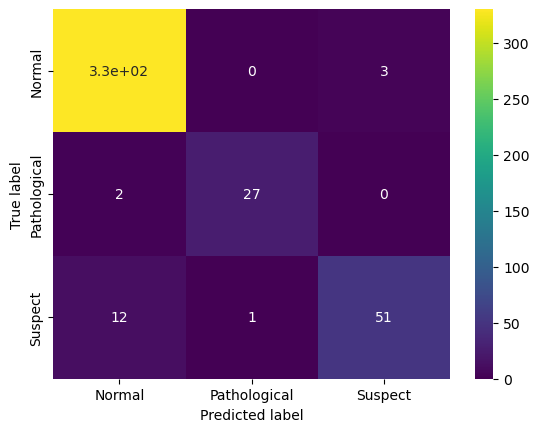

In [224]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, pred_final), annot=True, ax = ax, cmap = "viridis");

# labels, title and ticks
ax.set_xlabel("Predicted label");
ax.set_ylabel("True label"); 
ax.xaxis.set_ticklabels(["Normal", "Pathological", "Suspect"])
ax.yaxis.set_ticklabels(["Normal", "Pathological", "Suspect"]);

In [225]:
print(classification_report(y_test, pred_final))

              precision    recall  f1-score   support

      Normal       0.96      0.99      0.97       333
Pathological       0.96      0.93      0.95        29
     Suspect       0.94      0.80      0.86        64

    accuracy                           0.96       426
   macro avg       0.96      0.91      0.93       426
weighted avg       0.96      0.96      0.96       426



*In questo caso le performance sembrano beneficiare dell'ensemble dei tre modelli in quanto c'è un leggero miglioramento dal 95% al 96% rispetto al solo XGBoost*

**END**